In [82]:
import numpy as np
import pandas as pd

from scipy.optimize import curve_fit
from tqdm import tqdm


plt.rcParams['font.family'] = 'AppleGothic'  # 맥북에서 사용 가능한 한글 폰트
plt.rcParams['axes.unicode_minus'] = False  # 마이너스(-) 기호 깨짐 방지

In [59]:
df_1 = pd.read_csv('raw_data/youtube_info/오디오없는것삭제(최종전)/real_final_all_youtubeAPI_info.csv', encoding='utf-8')
df_2 = pd.read_csv('raw_data/youtube_info/youtube_video_subs_views_0521.csv', encoding='utf-8')
df_3 = pd.read_csv('raw_data/youtube_info/youtube_video_subs_views_0522.csv', encoding='utf-8')

del df_2['publishedAt']
del df_2['channelId']

del df_3['publishedAt']
del df_3['channelId']
df_3

video_id  viewCount  subscriberCount
0     s6suc9Xz0rM    22888.0         289000.0
1     kERWAGtltBU    82127.0         289000.0
2     8VcAaEfuc0s    62182.0         289000.0
3     CI331OcJ8Do   284166.0         289000.0
4     AOrtPpF1t7U   327802.0         289000.0
...           ...        ...              ...
6314  fLNAk4NYOJU    64939.0           6580.0
6315  Sh41rnVFlhU     7425.0           6580.0
6316  z1UGEkHIoCY    16448.0           6580.0
6317  xVaTzgcJttI    12663.0           6580.0
6318  WEkYWyi1gfA    19357.0           6580.0

[6319 rows x 3 columns]

In [61]:
len(df_3) == len(df_3['video_id'].unique())

True

In [63]:
df_1.rename(columns={'views':'views_0511'}, inplace=True)
df_1.rename(columns={'subscriber_count':'subscriber_count_0511'}, inplace=True)
df_2.rename(columns={'viewCount':'views_0521'}, inplace=True)
df_2.rename(columns={'subscriberCount':'subscriber_count_0521'}, inplace=True)
df_3.rename(columns={'viewCount':'views_0522'}, inplace=True)
df_3.rename(columns={'subscriberCount':'subscriber_count_0522'}, inplace=True)

# 조회수 null값인 것들 행 데이터 제외함
df_2 = df_2.loc[df_2['views_0521'].notnull(), :]
df_3 = df_3.loc[df_3['views_0522'].notnull(), :]
df_3

video_id  views_0522  subscriber_count_0522
0     s6suc9Xz0rM     22888.0               289000.0
1     kERWAGtltBU     82127.0               289000.0
2     8VcAaEfuc0s     62182.0               289000.0
3     CI331OcJ8Do    284166.0               289000.0
4     AOrtPpF1t7U    327802.0               289000.0
...           ...         ...                    ...
6314  fLNAk4NYOJU     64939.0                 6580.0
6315  Sh41rnVFlhU      7425.0                 6580.0
6316  z1UGEkHIoCY     16448.0                 6580.0
6317  xVaTzgcJttI     12663.0                 6580.0
6318  WEkYWyi1gfA     19357.0                 6580.0

[6185 rows x 3 columns]

In [65]:
df = pd.merge(df_1, df_2, how='inner', on='video_id')
df = pd.merge(df, df_3, how='inner', on='video_id')

In [67]:
# 5월 11일 기준 : 0인 것도 있다.
df.loc[df['views_0511']==0, :]

channel_title  subscriber_count_0511  \
4989  트로트뮤직 - K Trot                      0   
6027      ailgorithm                  12900   

                                                  title  \
4989  감성 트로트 모음 KPOP (TROT) PLAYLIST - 감성물씬 트롯 모음 [1...   
6027  [Playlist] 🎻Pleasant Piano Classics for Playin...   

                                        video_url          publish_date  \
4989  https://www.youtube.com/watch?v=c1Ql2SSrRsQ  2024-04-16T12:00:40Z   
6027  https://www.youtube.com/watch?v=kwNWMiMV5jI  2024-08-23T00:00:56Z   

                                         thumbnail_url  views_0511  likes  \
4989  https://i.ytimg.com/vi/c1Ql2SSrRsQ/hqdefault.jpg           0      0   
6027  https://i.ytimg.com/vi/kwNWMiMV5jI/hqdefault.jpg           0      0   

      comments                                           hashtags  \
4989         0  생동감 넘치는 2시간 트로트 메들리, 하루 종일 듣기 좋은 40곡 모음, 트로트 7...   
6027         0  아침, 클래식, 클래식음악, 클래식피아노, 클래식바이올린, 피아노, 피아노연주, 아...   

         video_id                                   title_normalized  \
4989  c1Ql2SSrRsQ  감성 트로트 모음 KPOP (TROT) PLAYLIST - 감성물씬 트롯 모음 [1...   
6027  kwNWMiMV5jI  [Playlist] 🎻Pleasant Piano Classics for Playin...   

                                             token_list   감성   일상  views_0521  \
4989  ['감성', '트로트', 'KPOP', 'TROT', 'PLAYLIST', '감성'...  1.0  0.0         0.0   
6027  ['Pleasant', 'Piano', 'Classics', 'for', 'Play...  1.0  1.0         0.0   

      subscriber_count_0521  views_0522  subscriber_count_0522  
4989                    0.0         0.0                    0.0  
6027                12900.0         0.0                12900.0

In [69]:
# 5월 21일 기준 : 0인 것도 있다.
df.loc[df['views_0521']==0, :]

channel_title  subscriber_count_0511  \
4989  트로트뮤직 - K Trot                      0   
6027      ailgorithm                  12900   

                                                  title  \
4989  감성 트로트 모음 KPOP (TROT) PLAYLIST - 감성물씬 트롯 모음 [1...   
6027  [Playlist] 🎻Pleasant Piano Classics for Playin...   

                                        video_url          publish_date  \
4989  https://www.youtube.com/watch?v=c1Ql2SSrRsQ  2024-04-16T12:00:40Z   
6027  https://www.youtube.com/watch?v=kwNWMiMV5jI  2024-08-23T00:00:56Z   

                                         thumbnail_url  views_0511  likes  \
4989  https://i.ytimg.com/vi/c1Ql2SSrRsQ/hqdefault.jpg           0      0   
6027  https://i.ytimg.com/vi/kwNWMiMV5jI/hqdefault.jpg           0      0   

      comments                                           hashtags  \
4989         0  생동감 넘치는 2시간 트로트 메들리, 하루 종일 듣기 좋은 40곡 모음, 트로트 7...   
6027         0  아침, 클래식, 클래식음악, 클래식피아노, 클래식바이올린, 피아노, 피아노연주, 아...   

         video_id                                   title_normalized  \
4989  c1Ql2SSrRsQ  감성 트로트 모음 KPOP (TROT) PLAYLIST - 감성물씬 트롯 모음 [1...   
6027  kwNWMiMV5jI  [Playlist] 🎻Pleasant Piano Classics for Playin...   

                                             token_list   감성   일상  views_0521  \
4989  ['감성', '트로트', 'KPOP', 'TROT', 'PLAYLIST', '감성'...  1.0  0.0         0.0   
6027  ['Pleasant', 'Piano', 'Classics', 'for', 'Play...  1.0  1.0         0.0   

      subscriber_count_0521  views_0522  subscriber_count_0522  
4989                    0.0         0.0                    0.0  
6027                12900.0         0.0                12900.0

In [71]:
df.loc[df['views_0522']==0, :]

channel_title  subscriber_count_0511  \
4989  트로트뮤직 - K Trot                      0   
6027      ailgorithm                  12900   

                                                  title  \
4989  감성 트로트 모음 KPOP (TROT) PLAYLIST - 감성물씬 트롯 모음 [1...   
6027  [Playlist] 🎻Pleasant Piano Classics for Playin...   

                                        video_url          publish_date  \
4989  https://www.youtube.com/watch?v=c1Ql2SSrRsQ  2024-04-16T12:00:40Z   
6027  https://www.youtube.com/watch?v=kwNWMiMV5jI  2024-08-23T00:00:56Z   

                                         thumbnail_url  views_0511  likes  \
4989  https://i.ytimg.com/vi/c1Ql2SSrRsQ/hqdefault.jpg           0      0   
6027  https://i.ytimg.com/vi/kwNWMiMV5jI/hqdefault.jpg           0      0   

      comments                                           hashtags  \
4989         0  생동감 넘치는 2시간 트로트 메들리, 하루 종일 듣기 좋은 40곡 모음, 트로트 7...   
6027         0  아침, 클래식, 클래식음악, 클래식피아노, 클래식바이올린, 피아노, 피아노연주, 아...   

         video_id                                   title_normalized  \
4989  c1Ql2SSrRsQ  감성 트로트 모음 KPOP (TROT) PLAYLIST - 감성물씬 트롯 모음 [1...   
6027  kwNWMiMV5jI  [Playlist] 🎻Pleasant Piano Classics for Playin...   

                                             token_list   감성   일상  views_0521  \
4989  ['감성', '트로트', 'KPOP', 'TROT', 'PLAYLIST', '감성'...  1.0  0.0         0.0   
6027  ['Pleasant', 'Piano', 'Classics', 'for', 'Play...  1.0  1.0         0.0   

      subscriber_count_0521  views_0522  subscriber_count_0522  
4989                    0.0         0.0                    0.0  
6027                12900.0         0.0                12900.0

In [73]:
# 경과일 계산 및 log_linear 적용한 조회수 컬럼 생성

# 1. 날짜 처리
df['publish_date'] = pd.to_datetime(df['publish_date'], format="%Y-%m-%dT%H:%M:%SZ")

# 2. 경과일 계산 (기준일: 2025-05-11, 2025-05-21)
ref_0511 = pd.to_datetime("2025-05-11")
ref_0521 = pd.to_datetime("2025-05-21")
ref_0522 = pd.to_datetime("2025-05-22")

df['upload_elapsed_0511'] = (ref_0511 - df['publish_date']).dt.days
df['upload_elapsed_0521'] = (ref_0521 - df['publish_date']).dt.days
df['upload_elapsed_0522'] = (ref_0522 - df['publish_date']).dt.days


# 3. 로그-선형 보정 함수
def log_linear_projection(t1, v1, t2, v2, target_day=180):
    try:
        # 로그 계산 불가한 경우
        if t1 <= 0 or t2 <= 0 or target_day <= 0:
            return np.nan
        
        log_t1, log_t2 = np.log(t1), np.log(t2)
        a = (v2 - v1) / (log_t2 - log_t1)
        b = v1 - a * log_t1
        return a * np.log(target_day) + b
    except:
        return np.nan

# 4-1. log_linear_views_180d 컬럼 계산
# 0511, 0521 기준으로 만든 것
df['log_linear_views_180d_1'] = df.apply(
    lambda row: log_linear_projection(
        row['upload_elapsed_0511'],
        row['views_0511'],
        row['upload_elapsed_0521'],
        row['views_0521'],
        target_day=180
    ),
    axis=1
)

# 4-2. log_linear_views_180d 컬럼 계산
# 0511, 0522 기준으로 만든 것
df['log_linear_views_180d_2'] = df.apply(
    lambda row: log_linear_projection(
        row['upload_elapsed_0511'],
        row['views_0511'],
        row['upload_elapsed_0522'],
        row['views_0522'],
        target_day=180
    ),
    axis=1
)


# 5-1. log_linear_subs_180d 컬럼 계산
# 0511, 0521 기준으로 만든 것
df['log_linear_subs_180d_1'] = df.apply(
    lambda row: log_linear_projection(
        row['upload_elapsed_0511'],
        row['subscriber_count_0511'],
        row['upload_elapsed_0521'],
        row['subscriber_count_0521'],
        target_day=180
    ),
    axis=1
)


# 5-2. log_linear_subs_180d 컬럼 계산
# 0511, 0522 기준으로 만든 것
df['log_linear_subs_180d_2'] = df.apply(
    lambda row: log_linear_projection(
        row['upload_elapsed_0511'],
        row['subscriber_count_0511'],
        row['upload_elapsed_0522'],
        row['subscriber_count_0522'],
        target_day=180
    ),
    axis=1
)



# 6. 선형 보정 함수 정의
def linear_projection(t1, v1, t2, v2, target_day=180):
    try:
        # 유효하지 않은 값 체크
        if t1 == t2 or any(pd.isnull([t1, v1, t2, v2])):
            return np.nan
        a = (v2 - v1) / (t2 - t1)
        b = v1 - a * t1
        return a * target_day + b
    except:
        return np.nan


# 7-1. 새로운 선형 추정 컬럼 추가
# 0511, 0521 기준으로 만든 것
df['linear_views_180d_1'] = df.apply(
    lambda row: linear_projection(
        row['upload_elapsed_0511'],
        row['views_0511'],
        row['upload_elapsed_0521'],
        row['views_0521'],
        target_day=180
    ),
    axis=1
)

df['linear_subs_180d_1'] = df.apply(
    lambda row: linear_projection(
        row['upload_elapsed_0511'],
        row['subscriber_count_0511'],
        row['upload_elapsed_0521'],
        row['subscriber_count_0521'],
        target_day=180
    ),
    axis=1
)

# 7-2. 새로운 선형 추정 컬럼 추가
# 0511, 0522 기준으로 만든 것
df['linear_views_180d_2'] = df.apply(
    lambda row: linear_projection(
        row['upload_elapsed_0511'],
        row['views_0511'],
        row['upload_elapsed_0522'],
        row['views_0522'],
        target_day=180
    ),
    axis=1
)

df['linear_subs_180d_2'] = df.apply(
    lambda row: linear_projection(
        row['upload_elapsed_0511'],
        row['subscriber_count_0511'],
        row['upload_elapsed_0522'],
        row['subscriber_count_0522'],
        target_day=180
    ),
    axis=1
)


df.head()

channel_title  subscriber_count_0511  \
0  Jazzne | 기분Jazz네                 287000   
1  Jazzne | 기분Jazz네                 287000   
2  Jazzne | 기분Jazz네                 287000   
3  Jazzne | 기분Jazz네                 287000   
4  Jazzne | 기분Jazz네                 287000   

                                               title  \
0  Playlist | 재즈로 무드있고 잔잔하게🌙 💟 | 내 방을 근사하게 만드는 로맨...   
1  Playlist | 일할 때 틀어 놓기 좋은 업무용 재즈 🖥️🎧 | 집중력을 높이는...   
2  Playlist | 여유롭게 쉬고 싶을 때 잔잔히 틀기 좋은 아늑한 겨울 재즈 | ...   
3  Playlist | 기분 좋은 아침을 여는 모닝 겨울 재즈 ☀️🪟 | 하루를 시작하...   
4  Playlist | 재즈가 내리는 계절, 겨울 🌨️❣️ | 눈 오는 날 듣기 좋은 ...   

                                     video_url        publish_date  \
0  https://www.youtube.com/watch?v=s6suc9Xz0rM 2025-02-08 23:50:00   
1  https://www.youtube.com/watch?v=kERWAGtltBU 2025-02-01 23:50:00   
2  https://www.youtube.com/watch?v=8VcAaEfuc0s 2025-01-25 23:50:00   
3  https://www.youtube.com/watch?v=CI331OcJ8Do 2025-01-18 23:50:00   
4  https://www.youtube.com/watch?v=AOrtPpF1t7U 2025-01-11 23:50:00   

                                      thumbnail_url  views_0511  likes  \
0  https://i.ytimg.com/vi/s6suc9Xz0rM/hqdefault.jpg       22675    423   
1  https://i.ytimg.com/vi/kERWAGtltBU/hqdefault.jpg       80929    404   
2  https://i.ytimg.com/vi/8VcAaEfuc0s/hqdefault.jpg       61860    324   
3  https://i.ytimg.com/vi/CI331OcJ8Do/hqdefault.jpg      265932   1042   
4  https://i.ytimg.com/vi/AOrtPpF1t7U/hqdefault.jpg      327122   1305   

   comments                                           hashtags  ...  \
0        82  기분째즈네, 기분재즈네, 재즈네, moodisjazz, 재즈피아노, 재즈란무엇인가,...  ...   
1        22  기분째즈네, 기분재즈네, 재즈네, moodisjazz, 재즈피아노, 재즈란무엇인가,...  ...   
2        19  기분째즈네, 기분재즈네, 재즈네, moodisjazz, 재즈피아노, 재즈란무엇인가,...  ...   
3        45  기분째즈네, 기분재즈네, 재즈네, moodisjazz, 재즈피아노, 재즈란무엇인가,...  ...   
4        43  기분째즈네, 기분재즈네, 재즈네, moodisjazz, 재즈피아노, 재즈란무엇인가,...  ...   

  upload_elapsed_0521 upload_elapsed_0522 log_linear_views_180d_1  \
0                 101                 102            24009.610684   
1                 108                 109            87956.024748   
2                 115                 116            63684.861792   
3                 122                 123           358857.271175   
4                 129                 130           330491.589598   

   log_linear_views_180d_2  log_linear_subs_180d_1  log_linear_subs_180d_2  \
0             23948.179601           300084.418466           298954.738035   
1             87775.855657           299514.736862           298430.476890   
2             63602.016966           298849.751898           297819.981154   
3            358275.727368           298095.554767           297128.740525   
4            330304.938990           297257.502583           296361.585265   

   linear_views_180d_1  linear_subs_180d_1  linear_views_180d_2  \
0              24490.6            304800.0         24398.363636   
1              90137.6            303400.0         89859.545455   
2              64170.0            302000.0         64055.454545   
3             379832.0            300600.0        378651.272727   
4             331129.7            299200.0        330892.909091   

   linear_subs_180d_2  
0       303181.818182  
1       301909.090909  
2       300636.363636  
3       299363.636364  
4       298090.909091  

[5 rows x 30 columns]

In [75]:
df.columns

Index(['channel_title', 'subscriber_count_0511', 'title', 'video_url',
       'publish_date', 'thumbnail_url', 'views_0511', 'likes', 'comments',
       'hashtags', 'video_id', 'title_normalized', 'token_list', '감성', '일상',
       'views_0521', 'subscriber_count_0521', 'views_0522',
       'subscriber_count_0522', 'upload_elapsed_0511', 'upload_elapsed_0521',
       'upload_elapsed_0522', 'log_linear_views_180d_1',
       'log_linear_views_180d_2', 'log_linear_subs_180d_1',
       'log_linear_subs_180d_2', 'linear_views_180d_1', 'linear_subs_180d_1',
       'linear_views_180d_2', 'linear_subs_180d_2'],
      dtype='object')

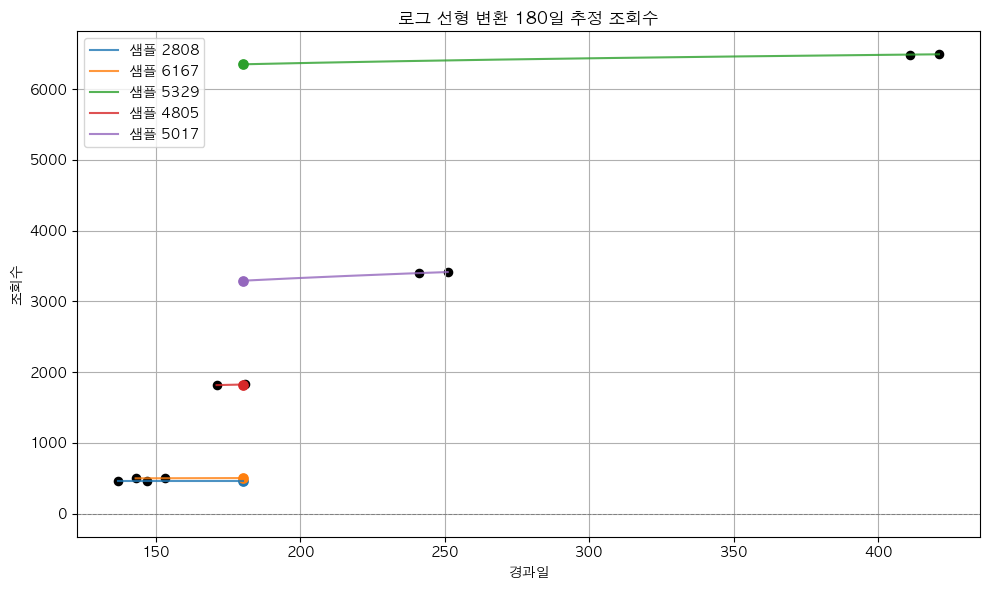

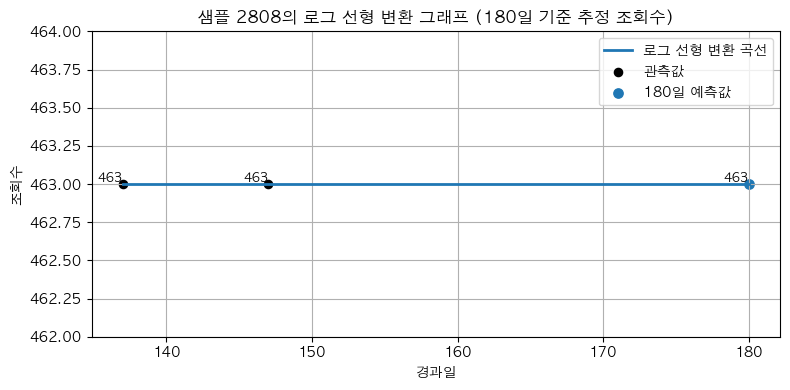

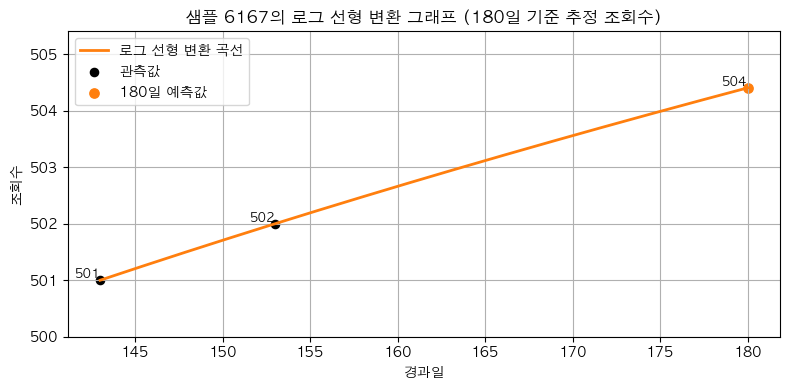

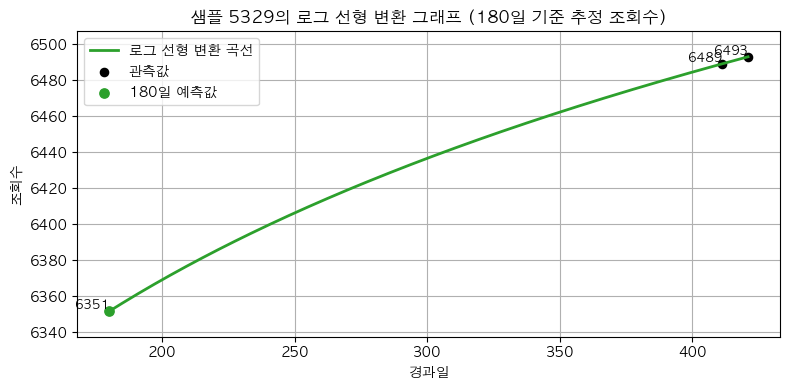

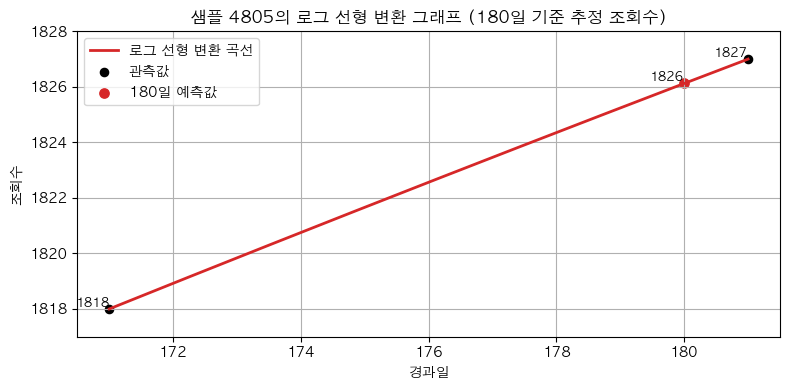

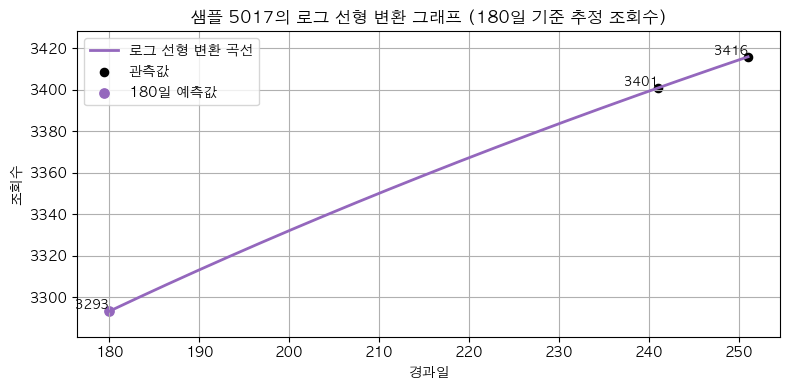

In [172]:
import matplotlib.pyplot as plt
import numpy as np

# 로그-선형 파라미터 구하는 함수
def get_log_linear_params(t1, v1, t2, v2):
    try:
        if t1 <= 0 or t2 <= 0 or t1 == t2:
            return np.nan, np.nan
        log_t1, log_t2 = np.log(t1), np.log(t2)
        a = (v2 - v1) / (log_t2 - log_t1)
        b = v1 - a * log_t1
        return a, b
    except:
        return np.nan, np.nan

# 유효한 데이터 샘플링
valid_df = df[df['log_linear_views_180d_1'] > 0].dropna(subset=['views_0511', 'views_0521'])
sample_df = valid_df.sample(n=5, random_state=42)

# 🎨 컬러맵 지정
cmap = plt.colormaps.get_cmap('tab10')
colors = [cmap(i % cmap.N) for i in range(len(sample_df))]
idx_list = sample_df.index.tolist()
color_map = {idx: color for idx, color in zip(idx_list, colors)}

# ✅ 1. 전체 곡선 한 화면에 그리기
plt.figure(figsize=(10, 6))

for idx, row in sample_df.iterrows():
    t1, v1 = row['upload_elapsed_0511'], row['views_0511']
    t2, v2 = row['upload_elapsed_0521'], row['views_0521']
    t3, v3 = 180, row['log_linear_views_180d_1']

    a, b = get_log_linear_params(t1, v1, t2, v2)
    if np.isnan(a) or np.isnan(b):
        continue

    t_min, t_max = min(t1, t2, t3), max(t1, t2, t3)
    t_vals = np.linspace(t_min, t_max, 200)
    y_vals = a * np.log(t_vals) + b

    color = color_map[idx]
    plt.plot(t_vals, y_vals, label=f'샘플 {idx}', color=color, alpha=0.8)

    # 관측값: 검정 점 (작게)
    plt.scatter([t1, t2], [v1, v2], color='black', s=35)

    # 추정값: 자기 그래프 색상
    plt.scatter(t3, v3, color=color, s=45)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.title('로그 선형 변환 180일 추정 조회수')
plt.xlabel('경과일')
plt.ylabel('조회수')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ✅ 2. 각 곡선을 개별 확대 그래프로 출력
for idx, row in sample_df.iterrows():
    t1, v1 = row['upload_elapsed_0511'], row['views_0511']
    t2, v2 = row['upload_elapsed_0521'], row['views_0521']
    t3, v3 = 180, row['log_linear_views_180d_1']

    a, b = get_log_linear_params(t1, v1, t2, v2)
    if np.isnan(a) or np.isnan(b):
        continue

    t_min, t_max = min(t1, t2, t3), max(t1, t2, t3)
    t_vals = np.linspace(t_min, t_max, 200)
    y_vals = a * np.log(t_vals) + b
    color = color_map[idx]

    plt.figure(figsize=(8, 4))
    plt.plot(t_vals, y_vals, color=color, linewidth=2, label='로그 선형 변환 곡선')

    # 관측값: 검정 점
    plt.scatter([t1, t2], [v1, v2], color='black', s=35, label='관측값')

    # 추정값: 해당 곡선 색상
    plt.scatter(t3, v3, color=color, s=45, label='180일 예측값')

    # 텍스트 라벨
    plt.text(t1, v1, f"{int(v1)}", fontsize=9, va='bottom', ha='right')
    plt.text(t2, v2, f"{int(v2)}", fontsize=9, va='bottom', ha='right')
    plt.text(t3, v3, f"{int(v3)}", fontsize=9, va='bottom', ha='right')

    # y축 범위 자동 조절
    y_margin = max((max(y_vals) - min(y_vals)) * 0.1, 1.0)
    plt.ylim(min(y_vals) - y_margin, max(y_vals) + y_margin)

    plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
    plt.title(f'샘플 {idx}의 로그 선형 변환 그래프 (180일 기준 추정 조회수)')
    plt.xlabel('경과일')
    plt.ylabel('조회수')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [373]:
# df = df.dropna(subset=['views_0511', 'views_0521', 'views_0522']).copy()
# df['view_diff'] = df[['views_0522', 'views_0511']].max(axis=1) - df[['views_0522', 'views_0511']].min(axis=1)

# # 예: 3개 시점 간 조회수 변화가 10 미만이면 제거
# df = df[df['view_diff'] > 0].copy()


### 바이럴 모델, 비바이럴 모델 피팅
* 180일 기준으로 조회수 변환
* 논문 기반

In [379]:
# from tqdm import tqdm
# from scipy.optimize import curve_fit

# viral_preds = []
# nonviral_preds = []

# TARGET_DAY = 180

# viral_preds = []
# nonviral_preds = []

# for _, row in tqdm(df.iterrows(), total=len(df)):
#     try:
#         t_vals = np.array([
#             row['upload_elapsed_0511'],
#             row['upload_elapsed_0521'],
#             row['upload_elapsed_0522']
#         ])
#         y_vals = np.array([
#             row['views_0511'],
#             row['views_0521'],
#             row['views_0522']
#         ])

#         if any(np.isnan(t_vals)) or any(np.isnan(y_vals)) or min(y_vals) <= 0:
#             raise ValueError("Invalid data (NaN or zero)")

#         S0 = y_vals[0]

#         def viral_model(t, M, lambd, k):
#             return M * np.exp(-np.log(np.maximum(M / S0, 1e-5)) * np.exp(-lambd * t)) + k * t

#         def nonviral_model(t, M, lambd, k):
#             return S0 + (M - S0) * (1 - np.exp(-lambd * t)) + k * t

#         init_guess = [max(y_vals) * 1.5, 0.05, 10]

#         # 둘 다 성공해야만 append
#         popt_viral, _ = curve_fit(viral_model, t_vals, y_vals, p0=init_guess, bounds=(0, np.inf))
#         popt_nonviral, _ = curve_fit(nonviral_model, t_vals, y_vals, p0=init_guess, bounds=(0, np.inf))

#         viral_preds.append(viral_model(180, *popt_viral))
#         nonviral_preds.append(nonviral_model(180, *popt_nonviral))

#     except Exception as e:
#         # 실패 시 둘 다 NaN
#         viral_preds.append(np.nan)
#         nonviral_preds.append(np.nan)


# # 리스트 길이 다시 체크
# print(f"df: {len(df)}, viral_preds: {len(viral_preds)}, nonviral_preds: {len(nonviral_preds)}")

# # 결과 저장
# df['viral_views_180d'] = viral_preds
# df['nonviral_views_180d'] = nonviral_preds


  0%|          | 0/6185 [00:00<?, ?it/s]/var/folders/dt/7btnc3n96tgd3mrpk_d5_x2m0000gn/T/ipykernel_14708/3190647107.py:39: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_viral, _ = curve_fit(viral_model, t_vals, y_vals, p0=init_guess, bounds=(0, np.inf))
/var/folders/dt/7btnc3n96tgd3mrpk_d5_x2m0000gn/T/ipykernel_14708/3190647107.py:40: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_nonviral, _ = curve_fit(nonviral_model, t_vals, y_vals, p0=init_guess, bounds=(0, np.inf))
100%|██████████| 6185/6185 [00:52<00:00, 117.73it/s]

df: 6185, viral_preds: 6185, nonviral_preds: 6185


In [28]:
df.to_csv('raw_data/youtube_info/구독자_조회수_추가_log_linear(최종)/rreal_final_all_youtubeAPI_info.csv', encoding='utf-8', index=False)

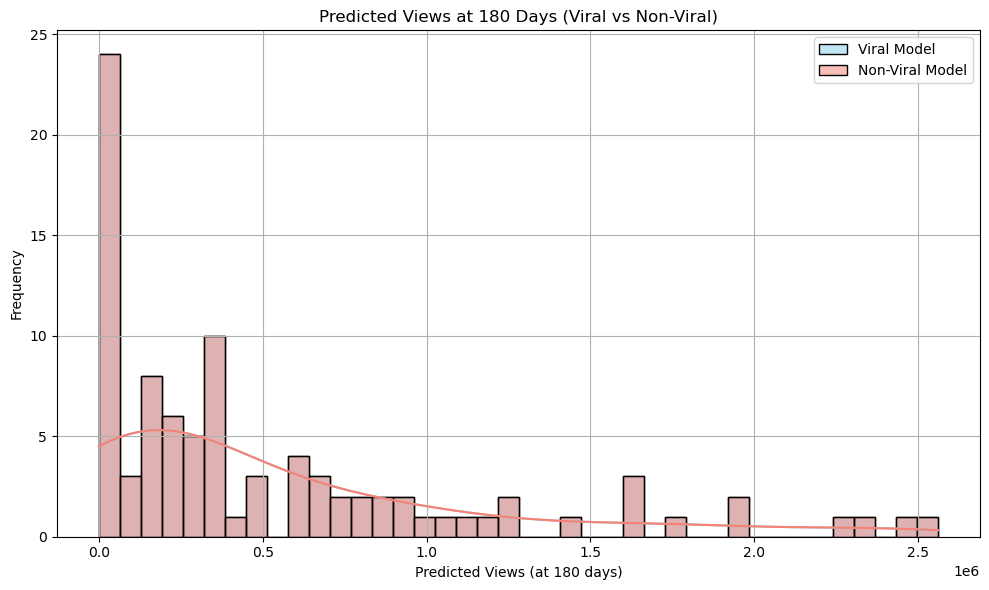

In [350]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 시각화를 위한 예시 DataFrame 구성 (df가 있다고 가정)
# 실제 환경에서는 df가 이미 존재하므로 생략
# 여기선 viral_views_180d와 nonviral_views_180d의 분포를 비교하는 히스토그램을 그림

# 히스토그램 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df['viral_views_180d'], label='Viral Model', color='skyblue', kde=True, bins=40)
sns.histplot(df['nonviral_views_180d'], label='Non-Viral Model', color='salmon', kde=True, bins=40)
plt.title("Predicted Views at 180 Days (Viral vs Non-Viral)")
plt.xlabel("Predicted Views (at 180 days)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/dt/7btnc3n96tgd3mrpk_d5_x2m0000gn/T/ipykernel_14708/4217075685.py:29: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(lambda t, M, lambd, k: nonviral_model(t, M, lambd, k, S0),


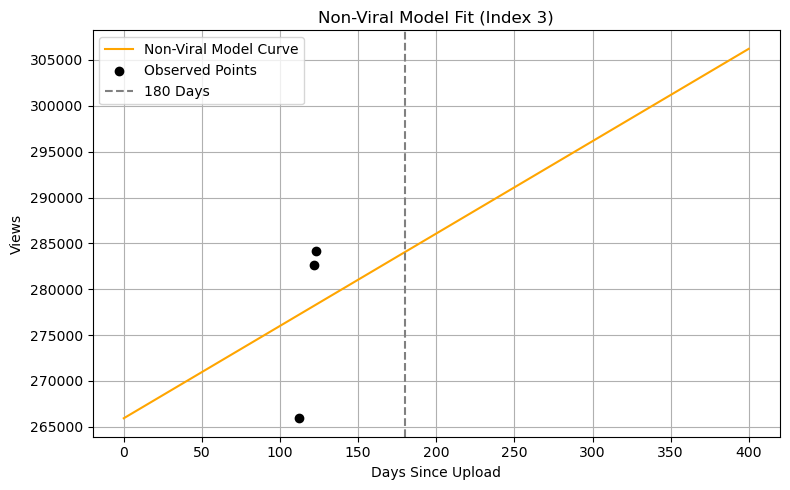

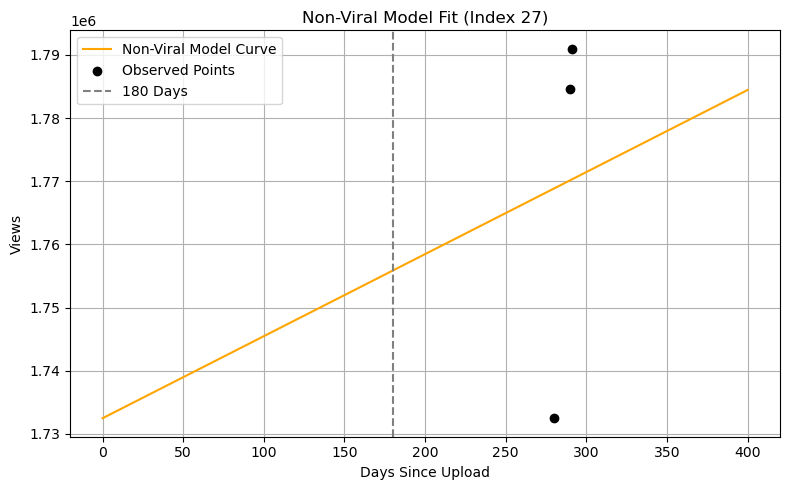

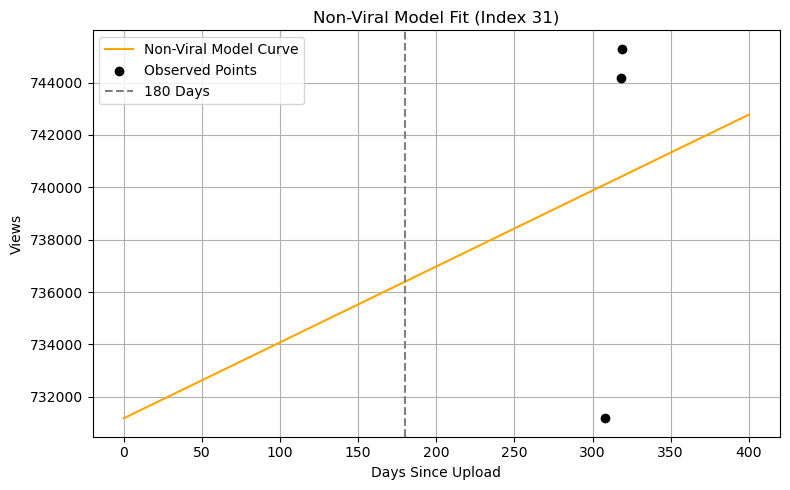

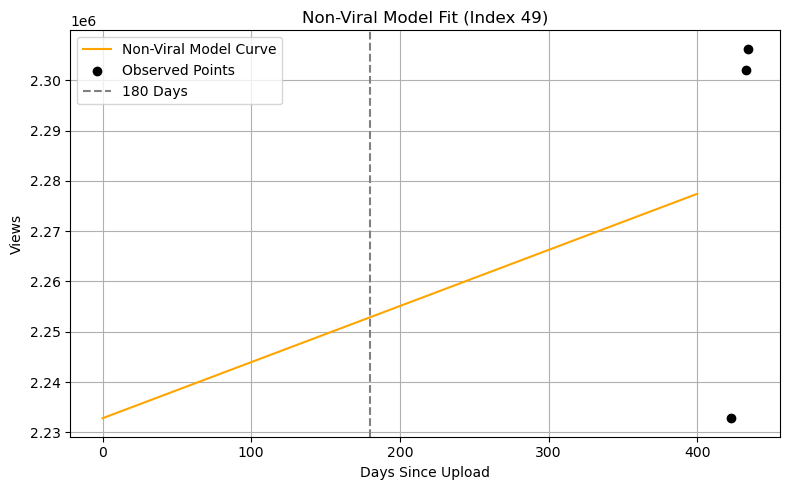

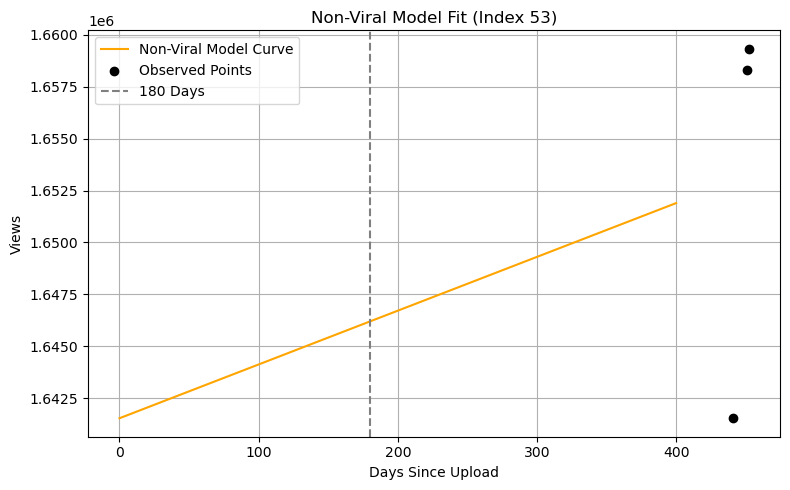

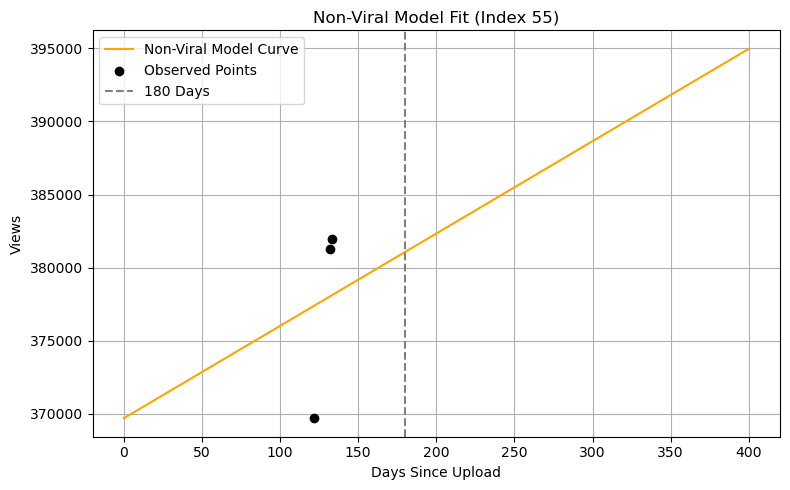

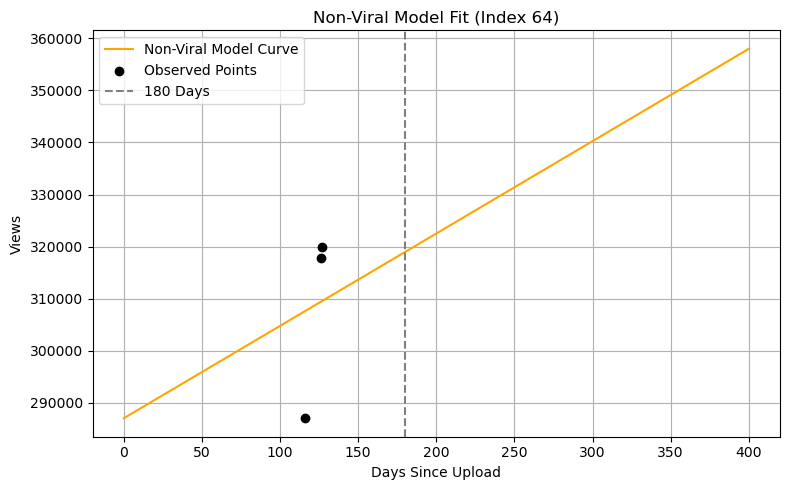

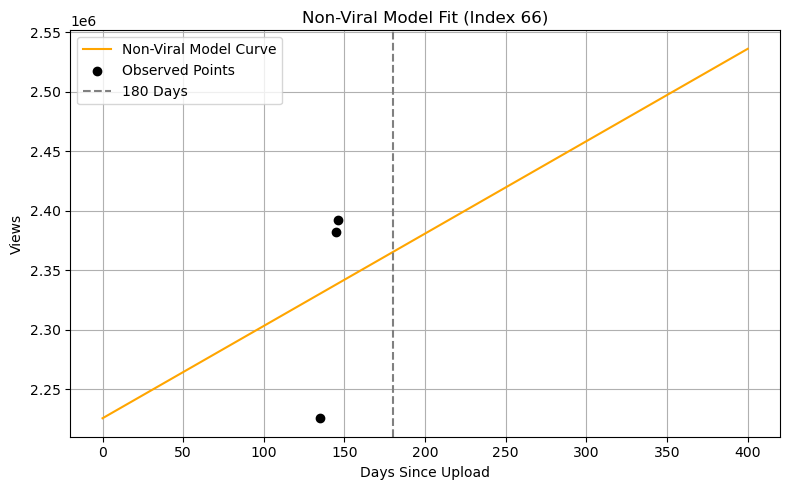

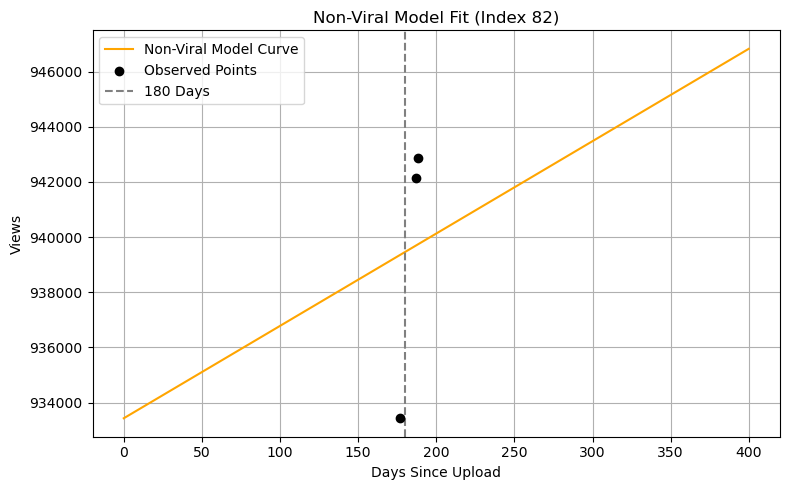

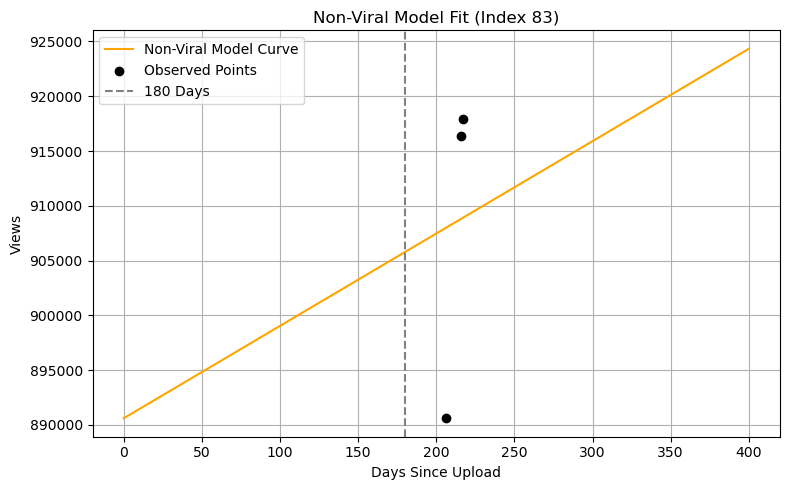

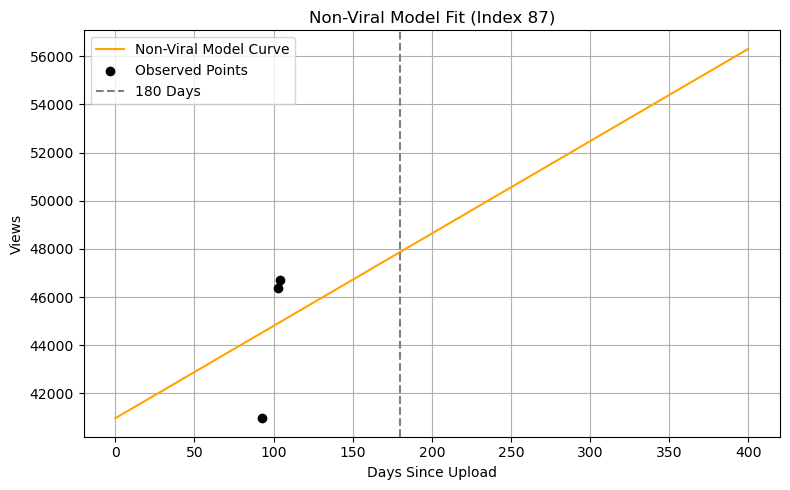

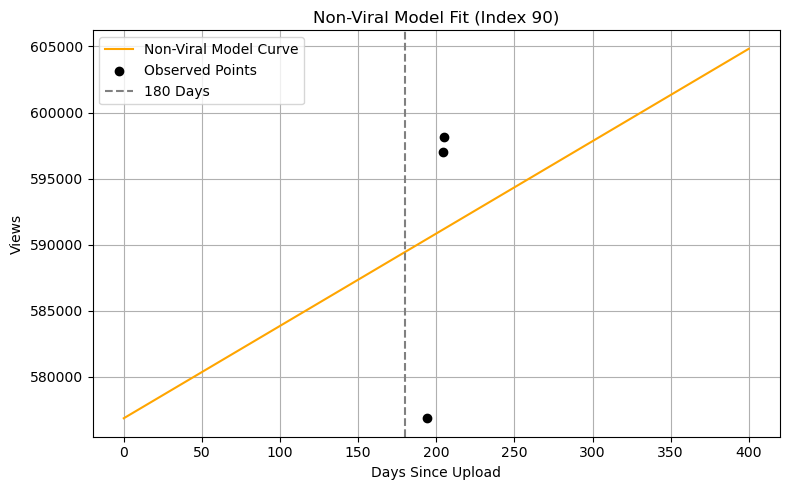

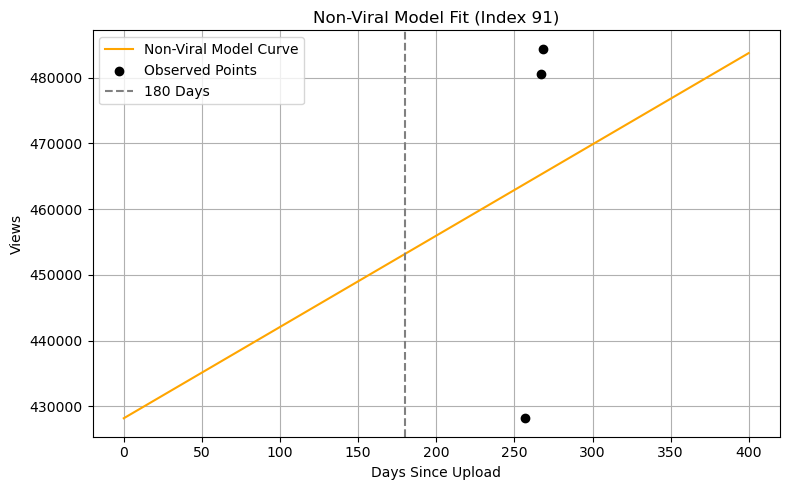

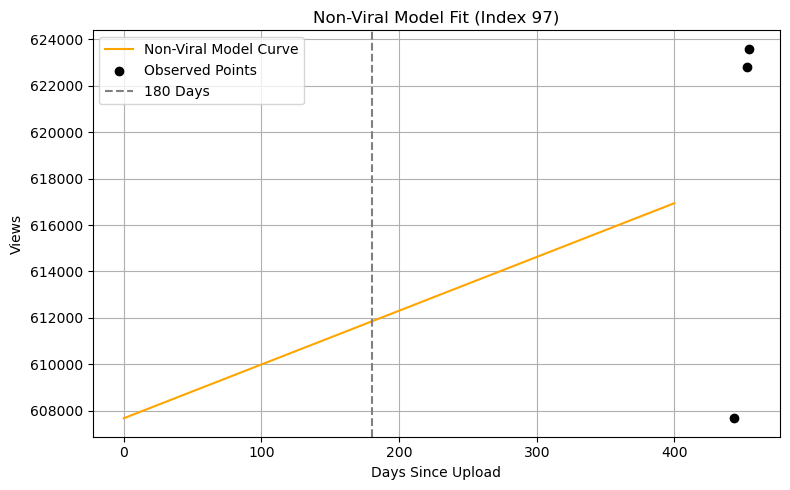

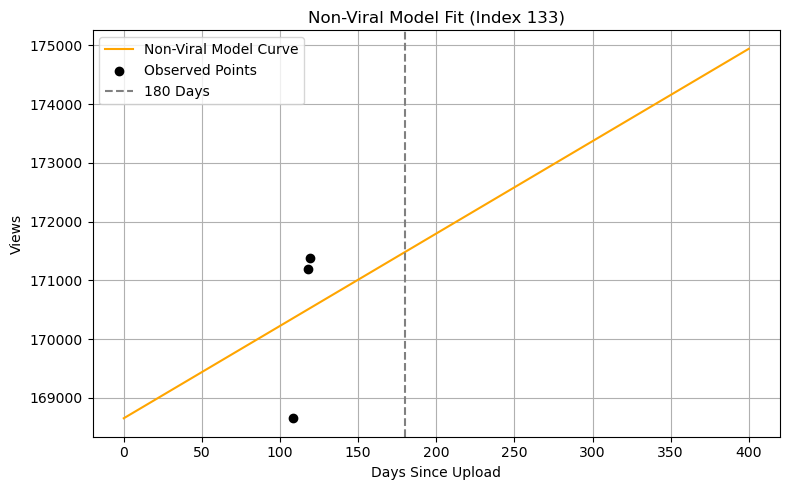

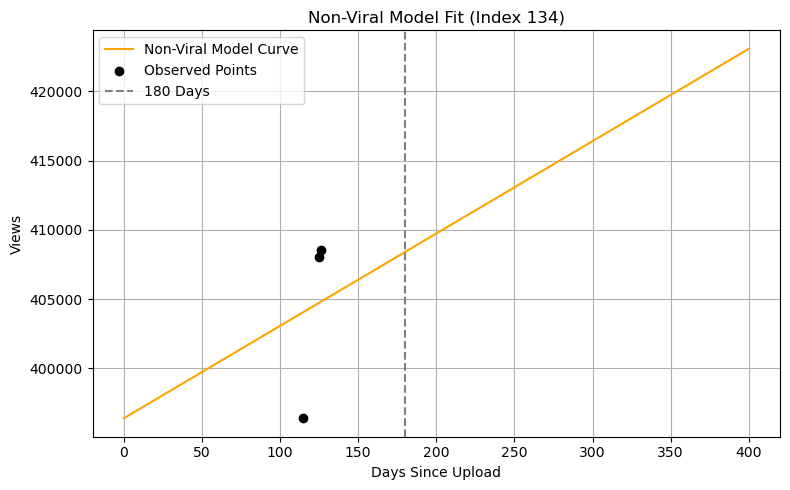

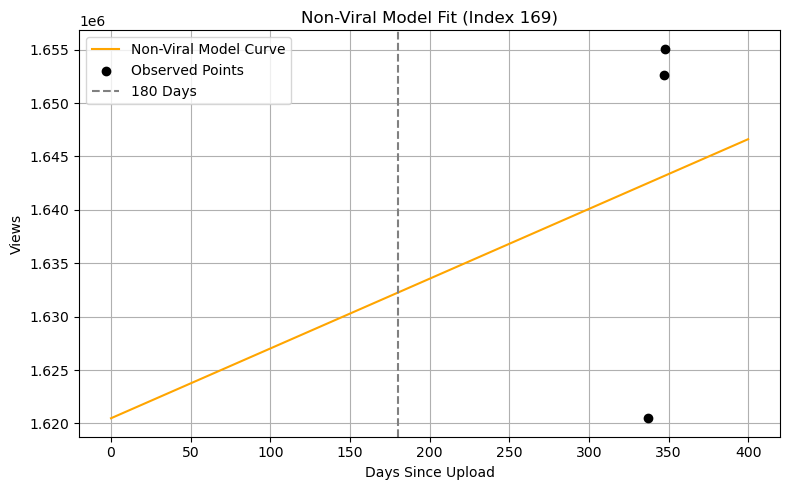

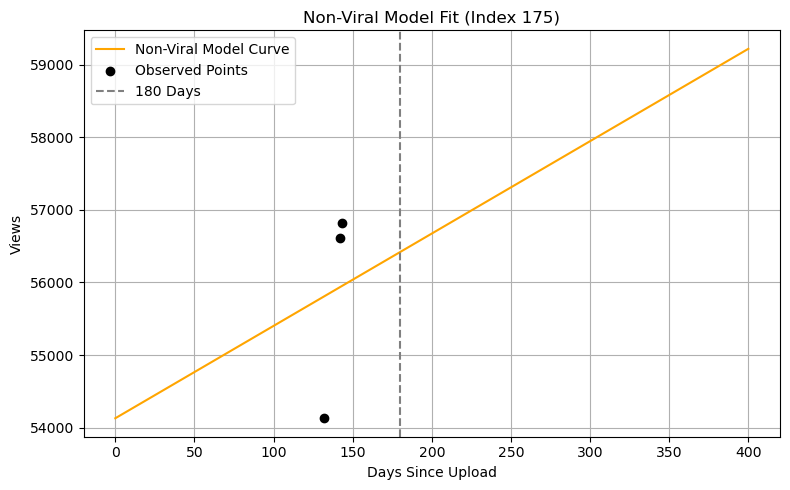

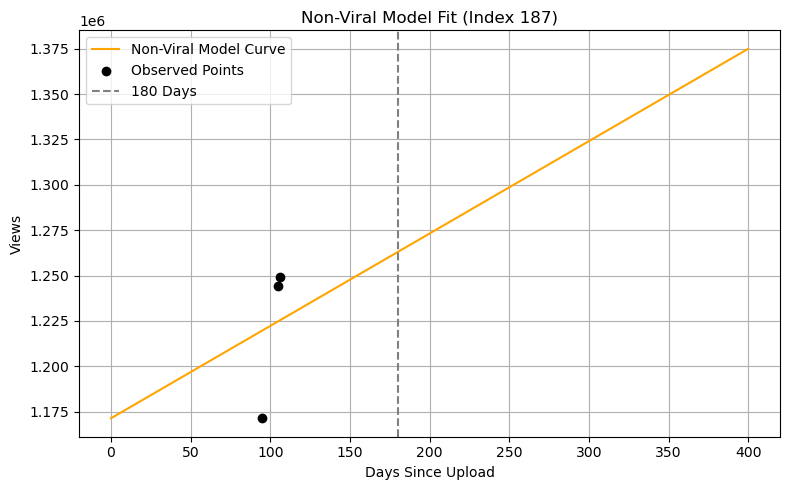

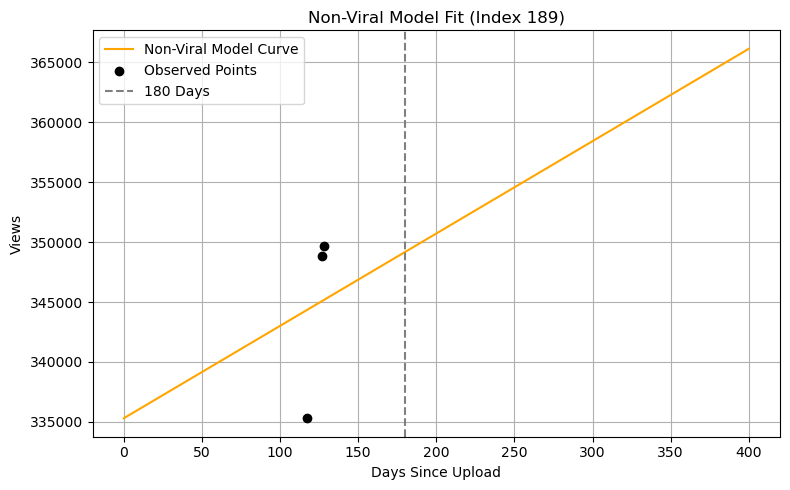

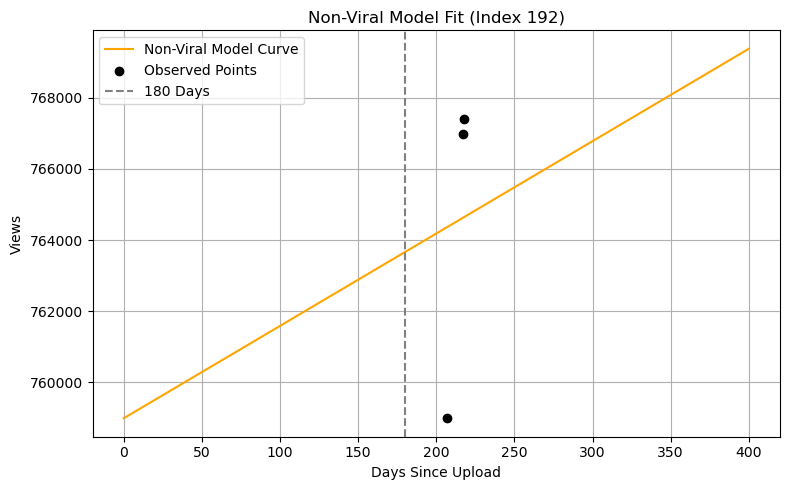

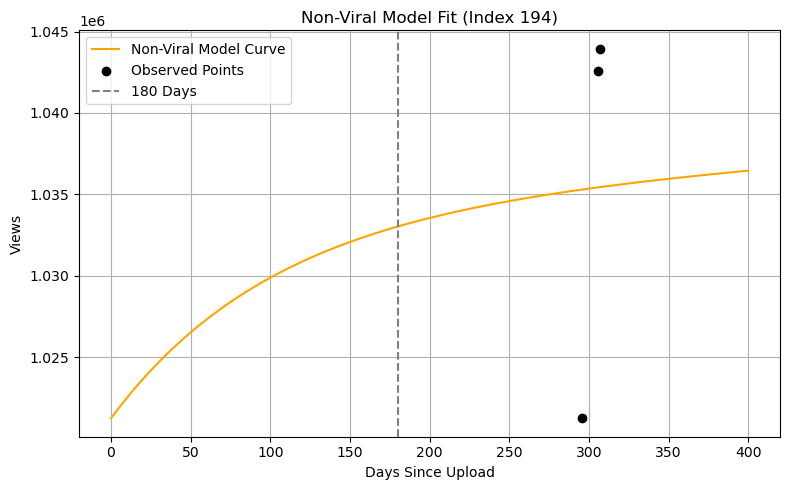

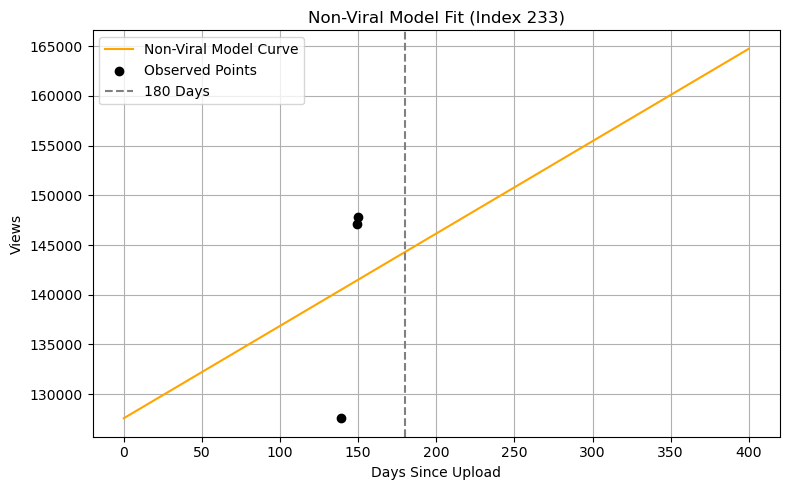

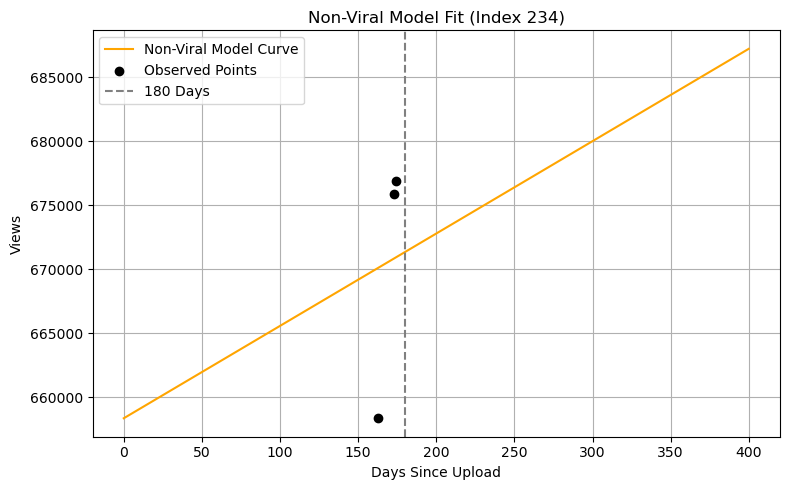

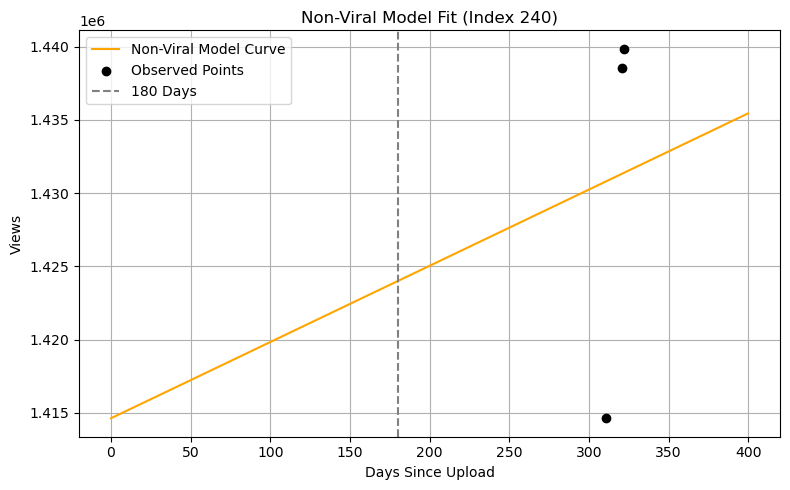

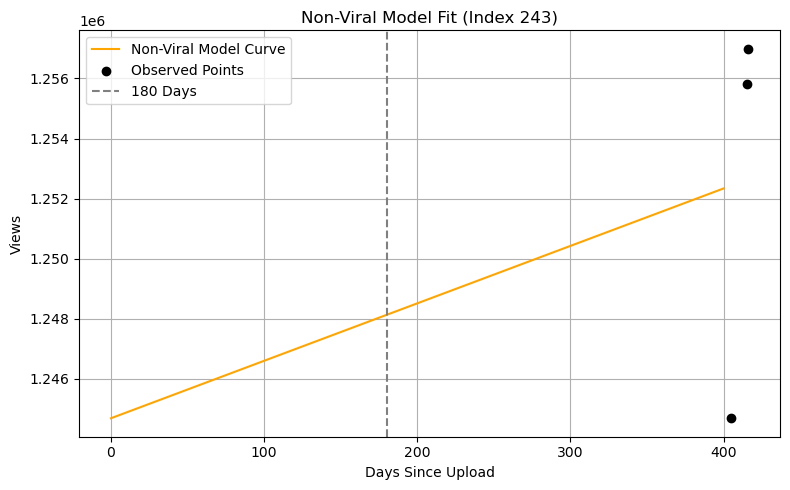

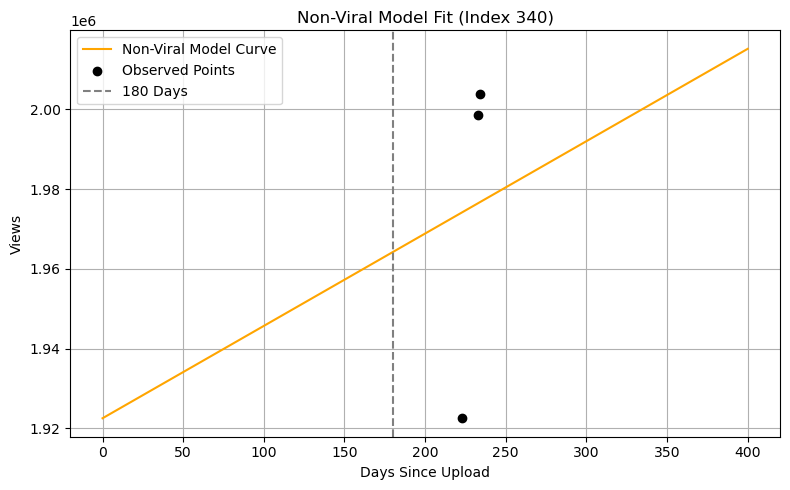

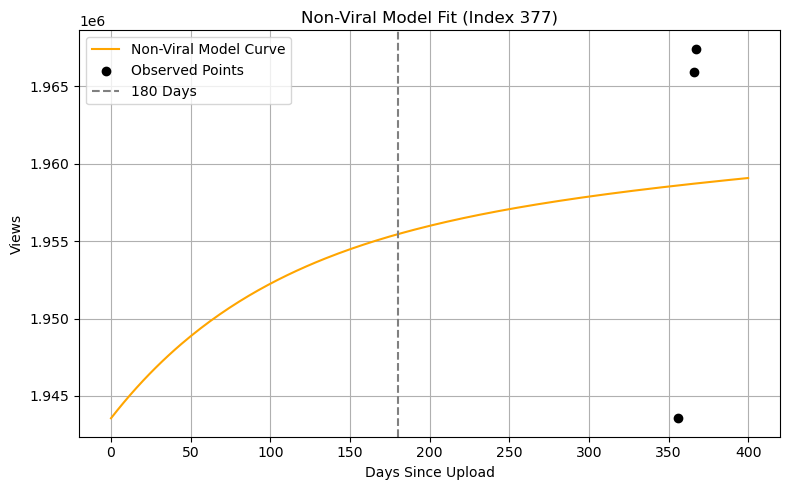

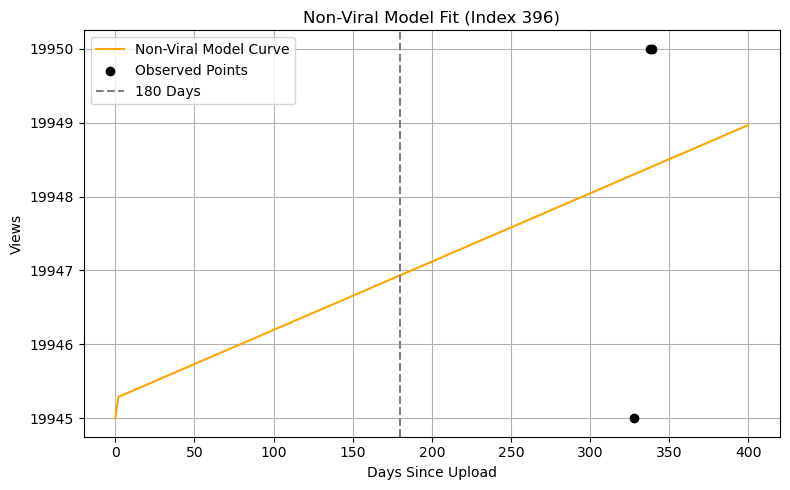

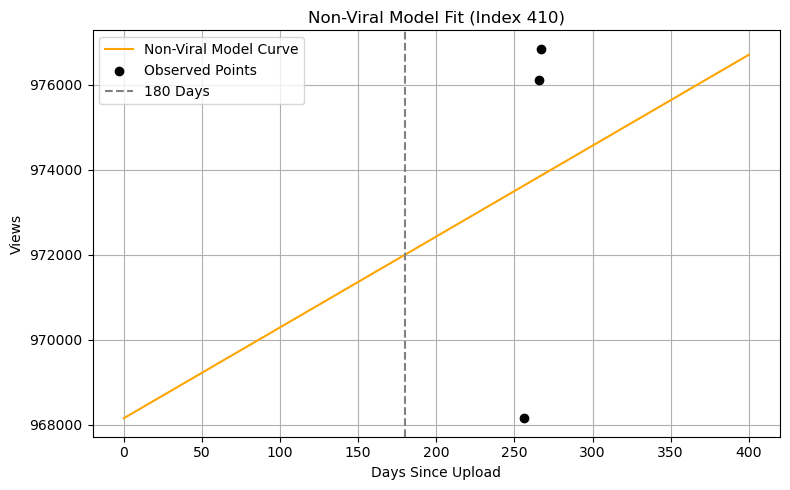

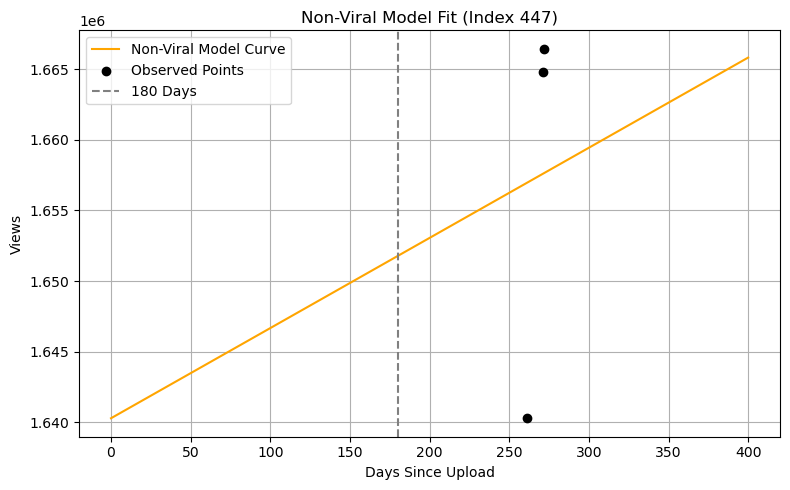

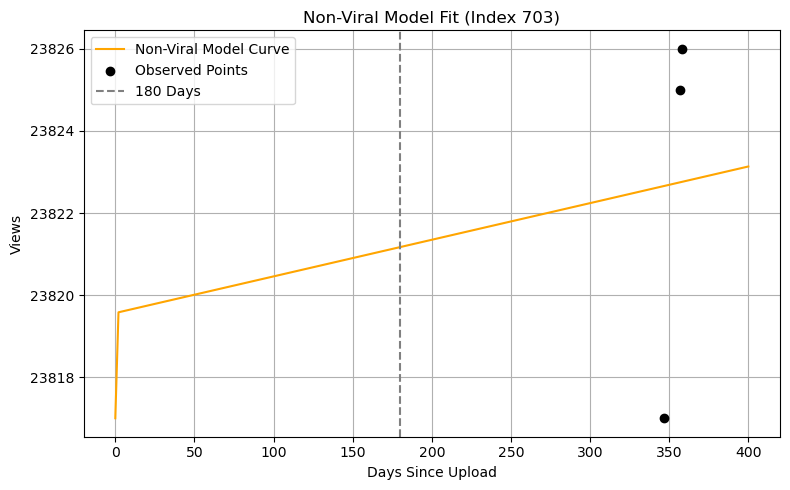

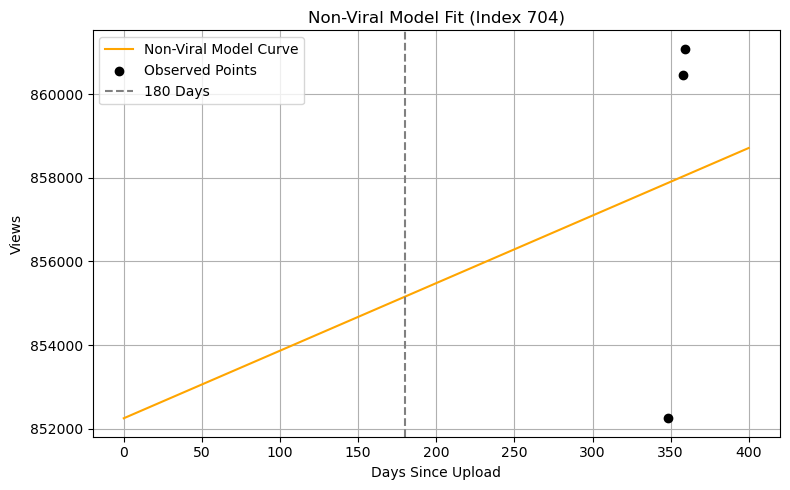

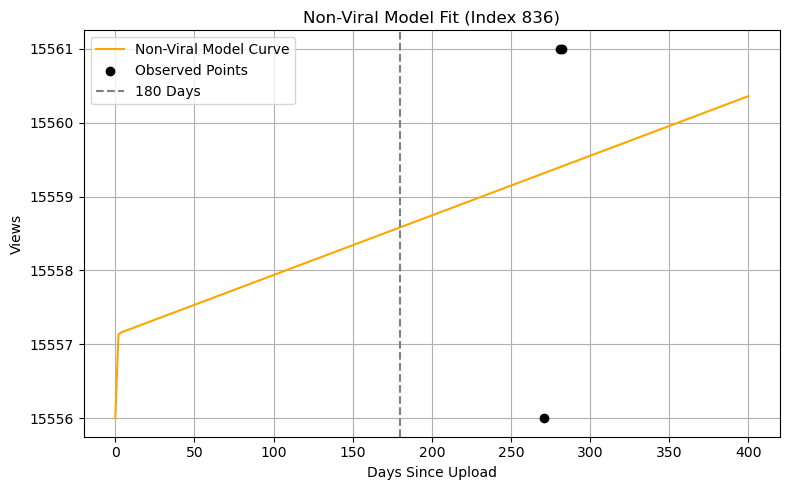

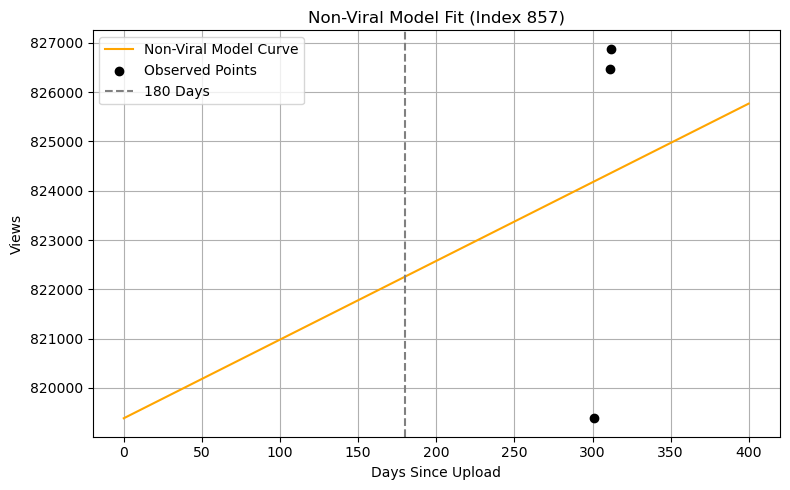

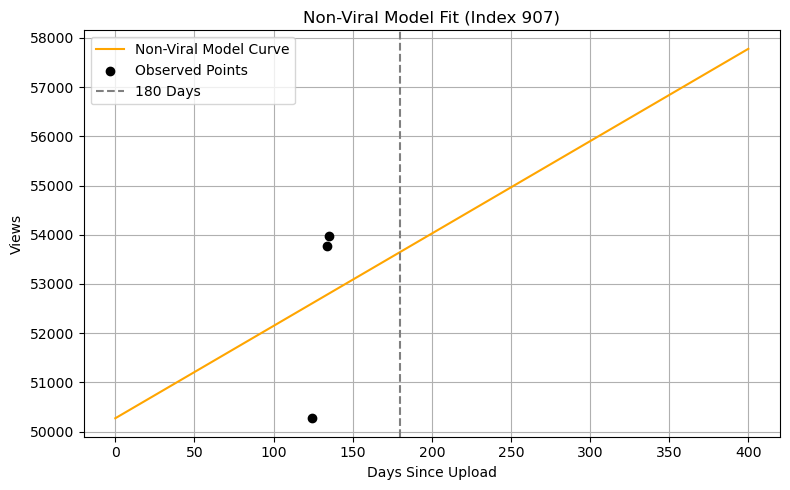

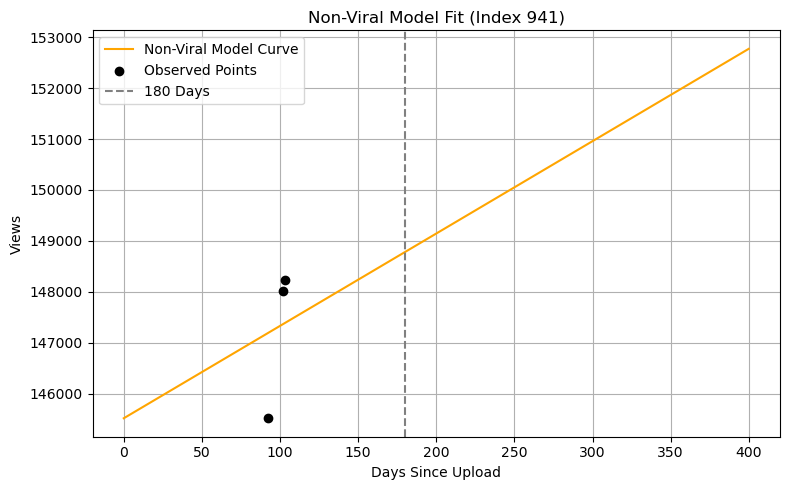

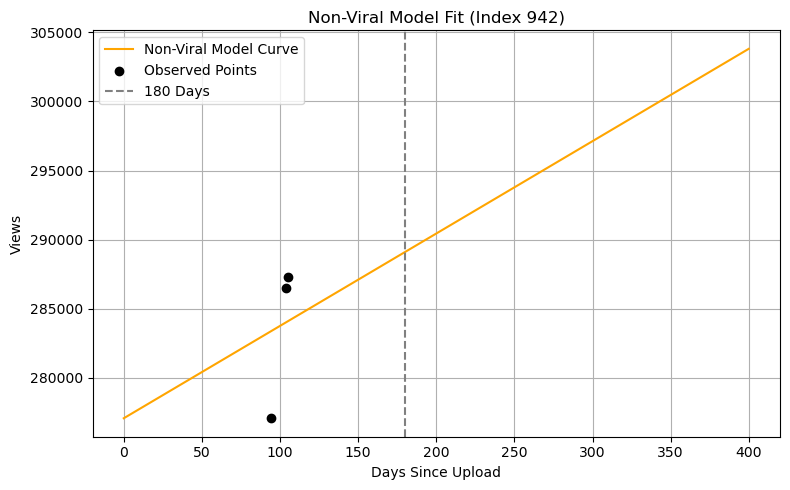

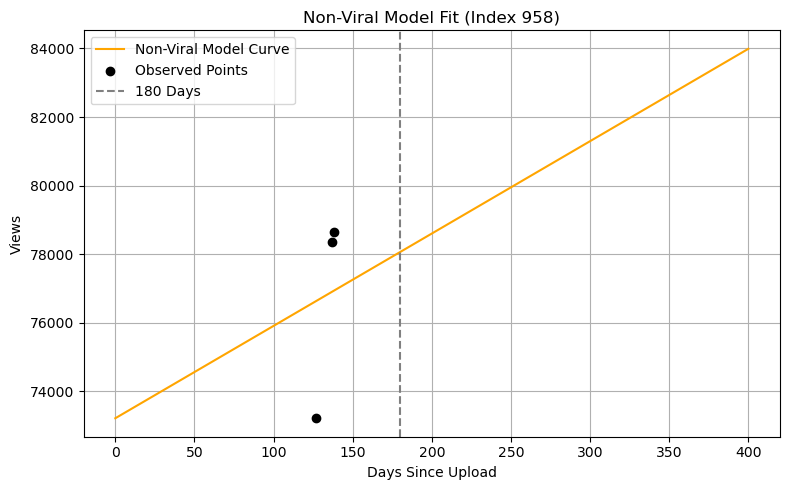

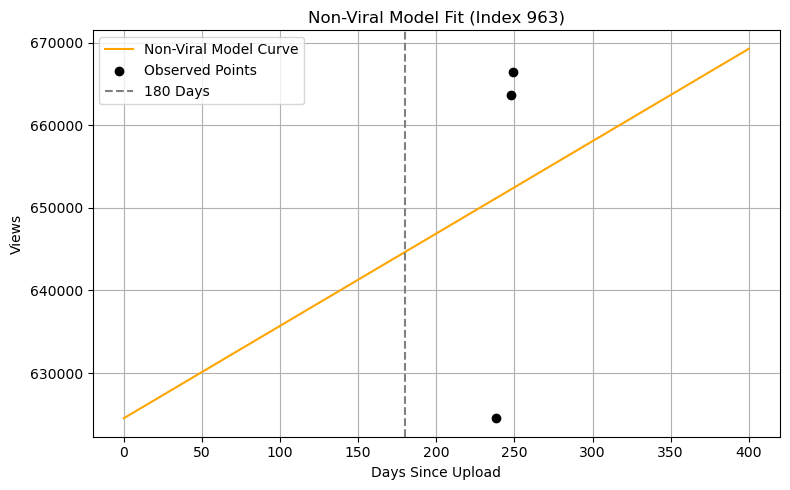

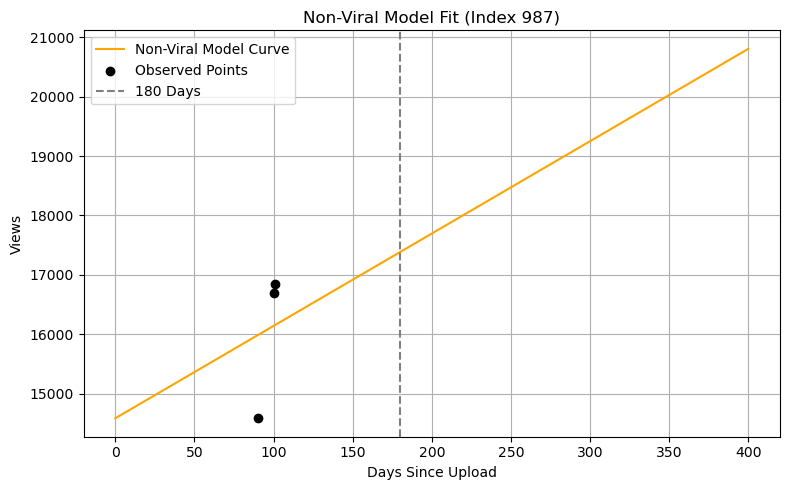

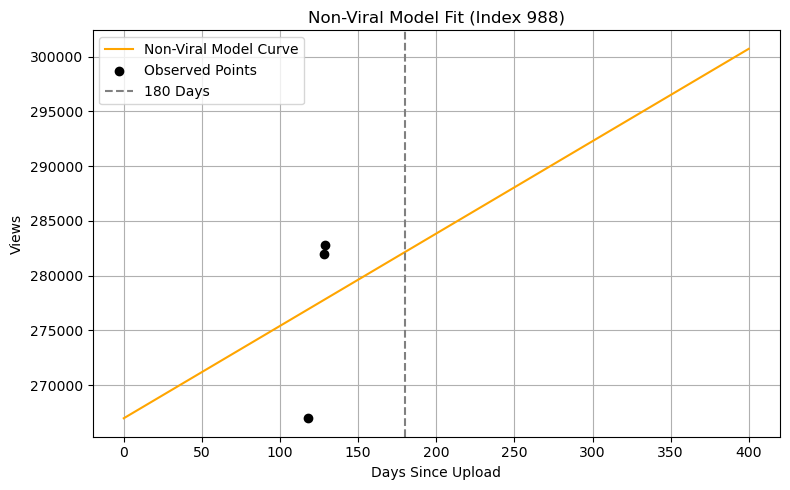

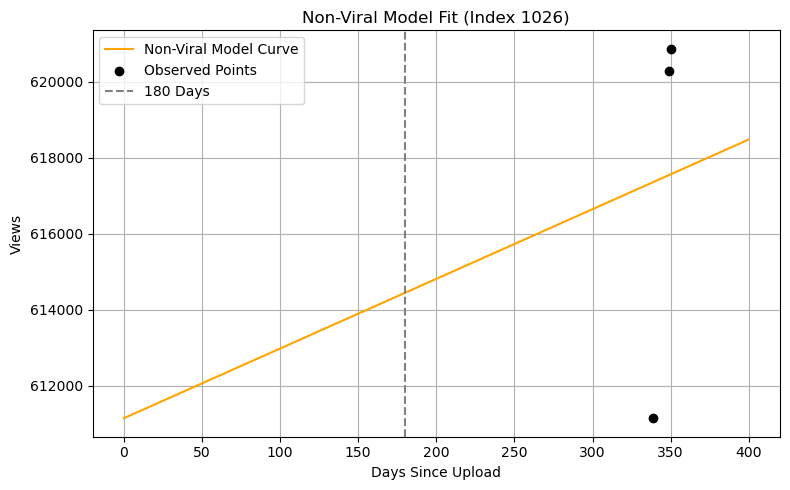

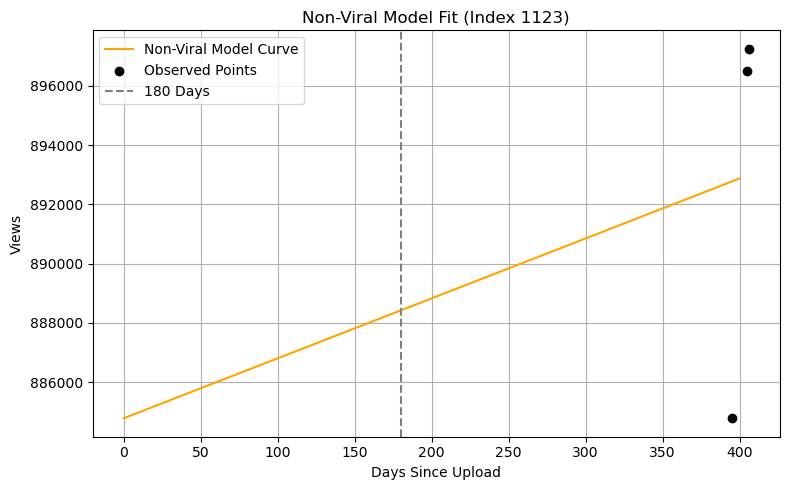

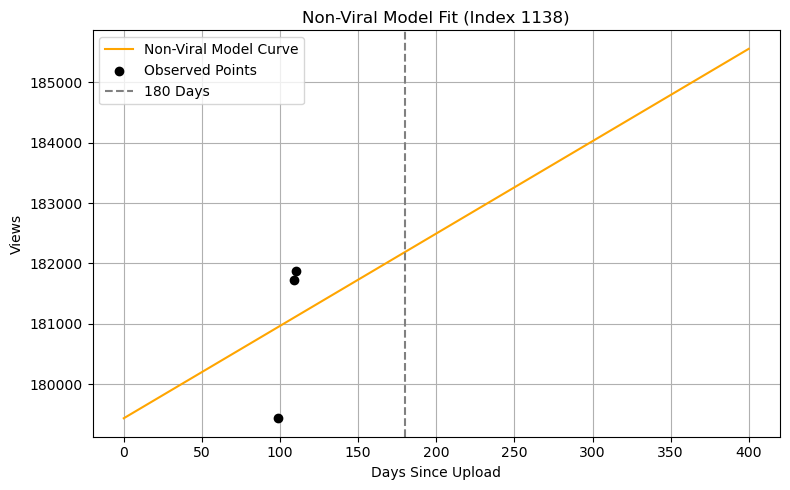

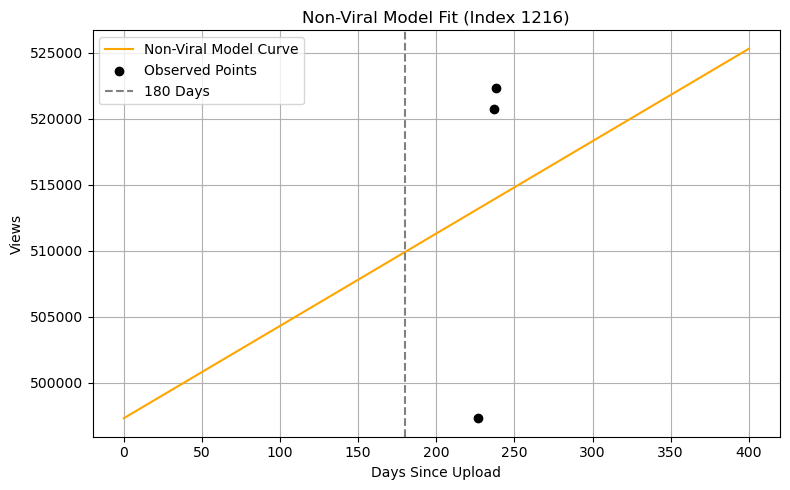

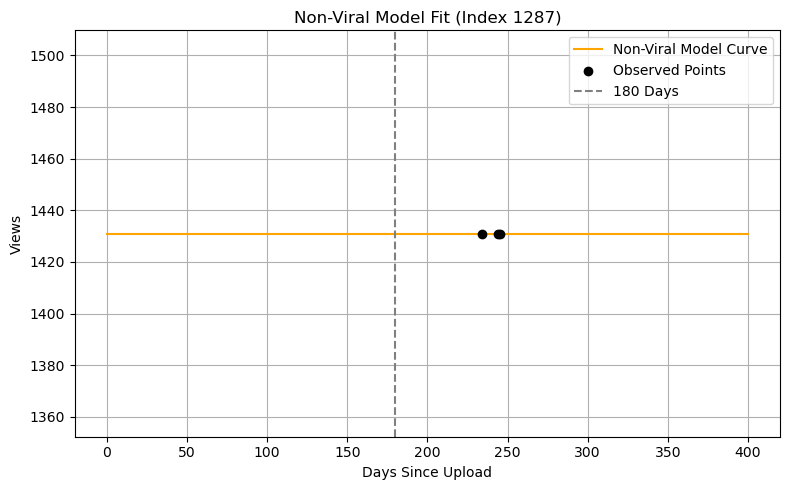

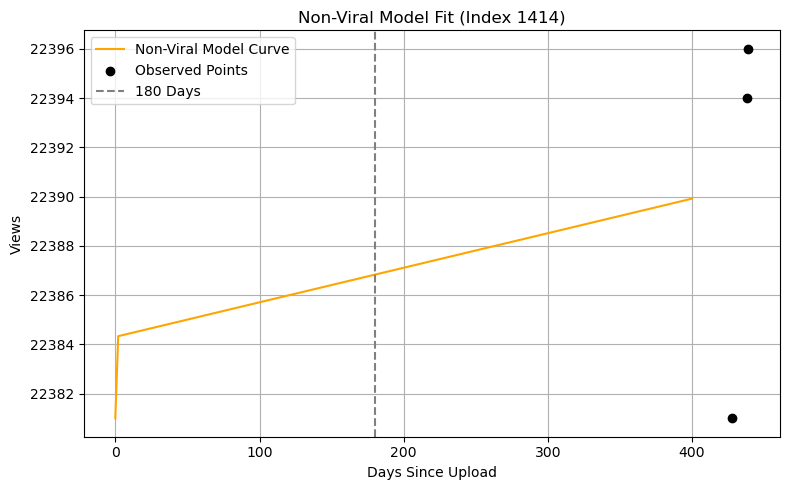

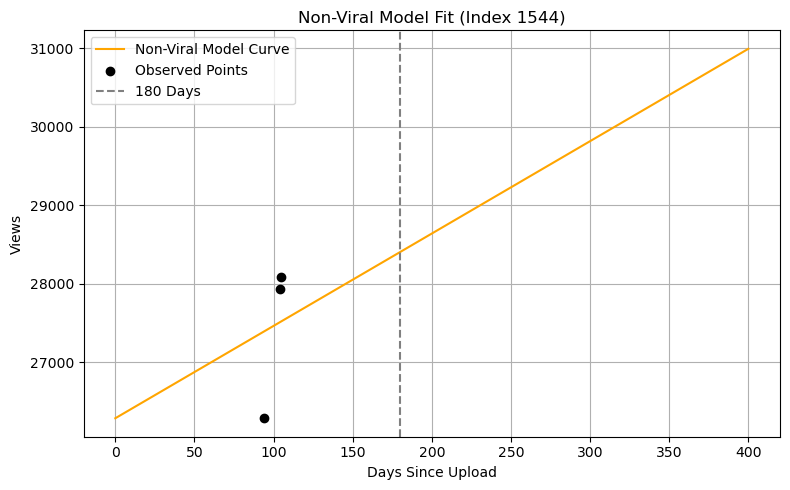

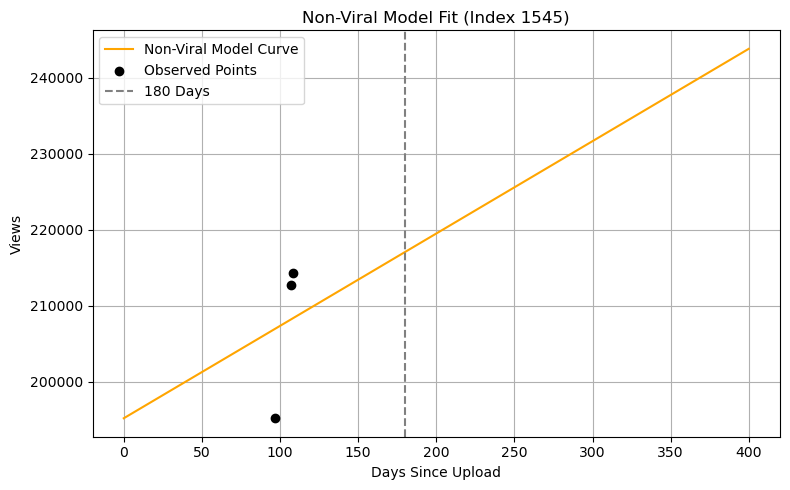

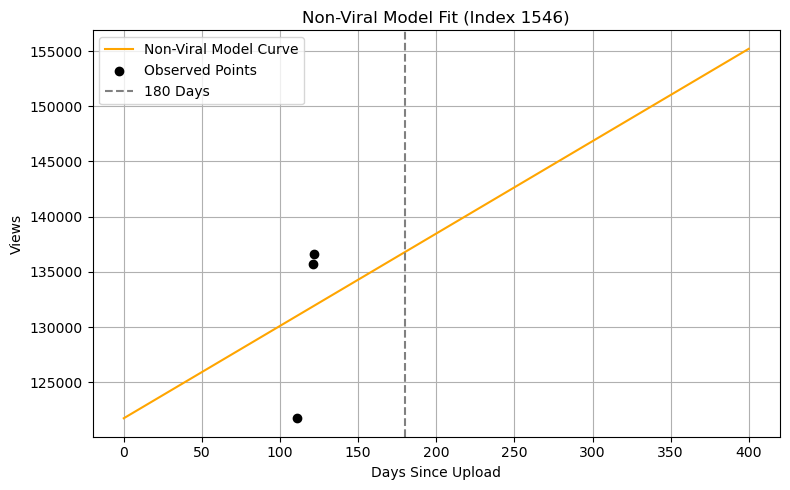

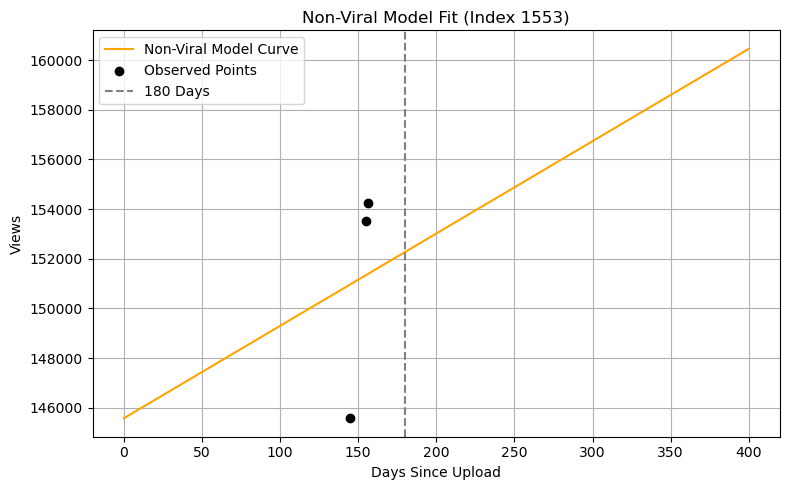

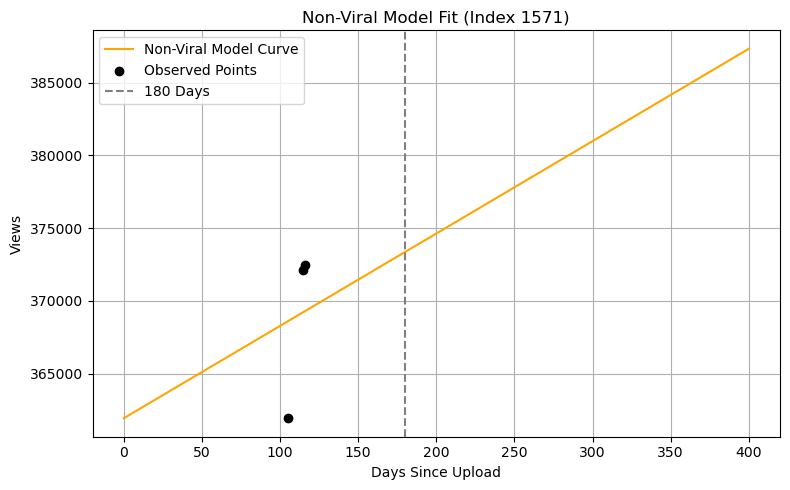

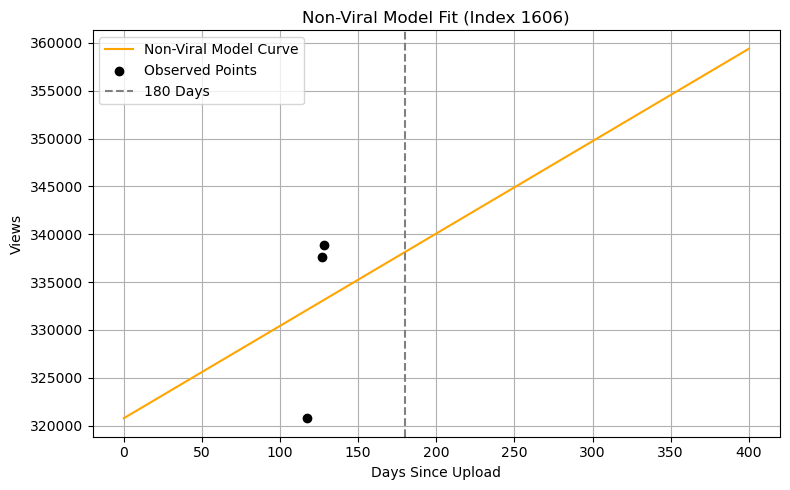

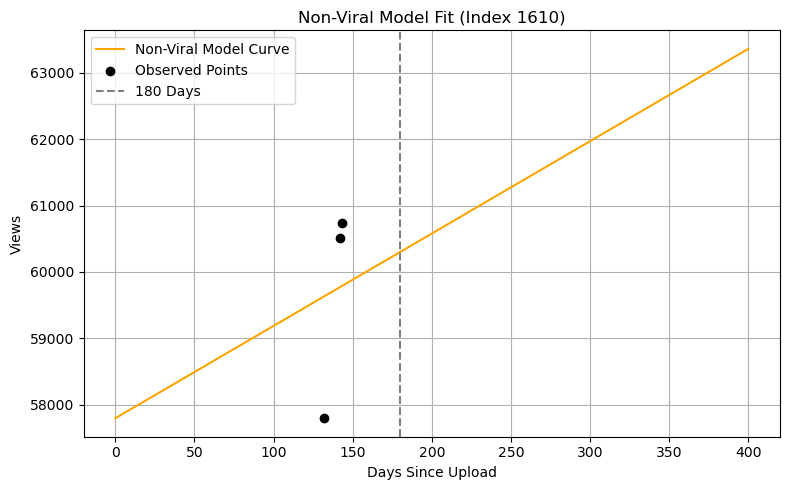

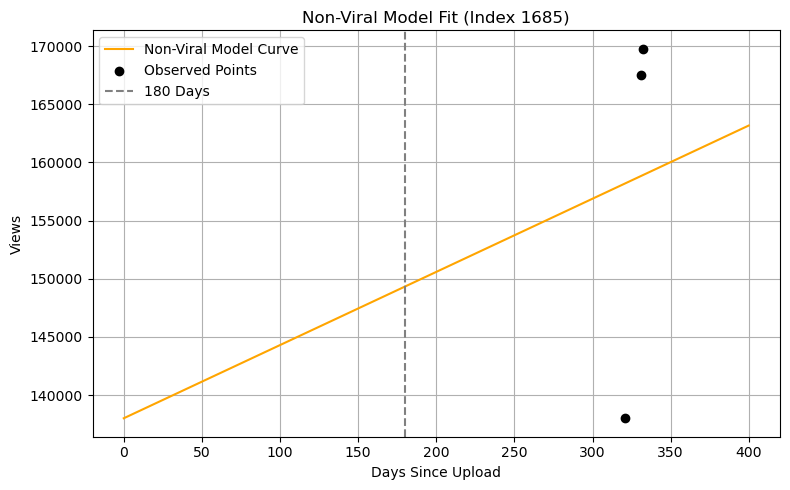

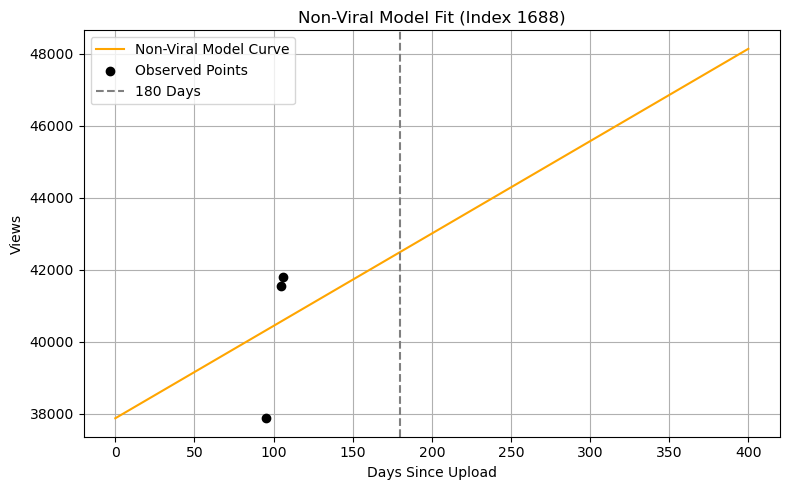

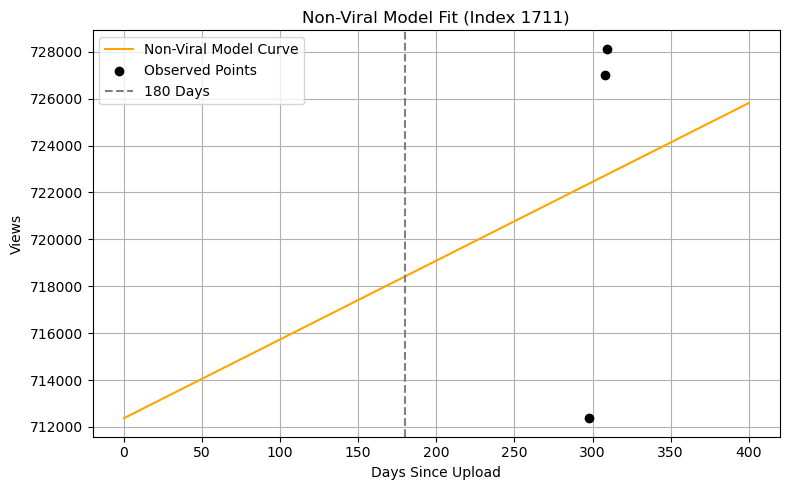

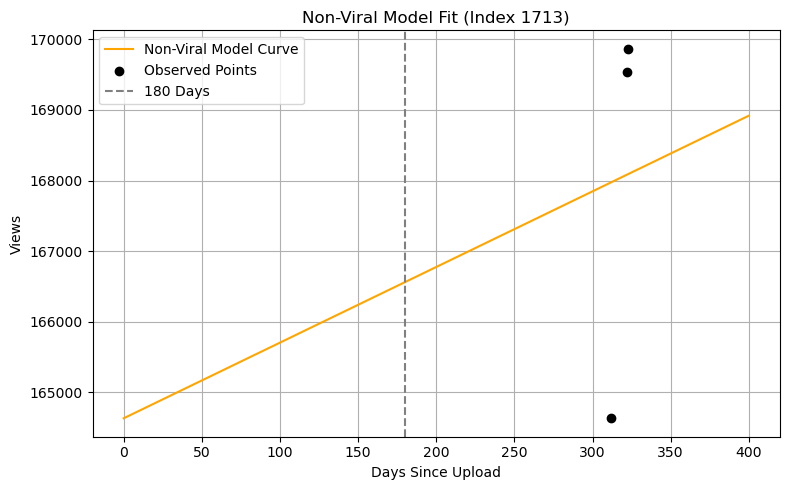

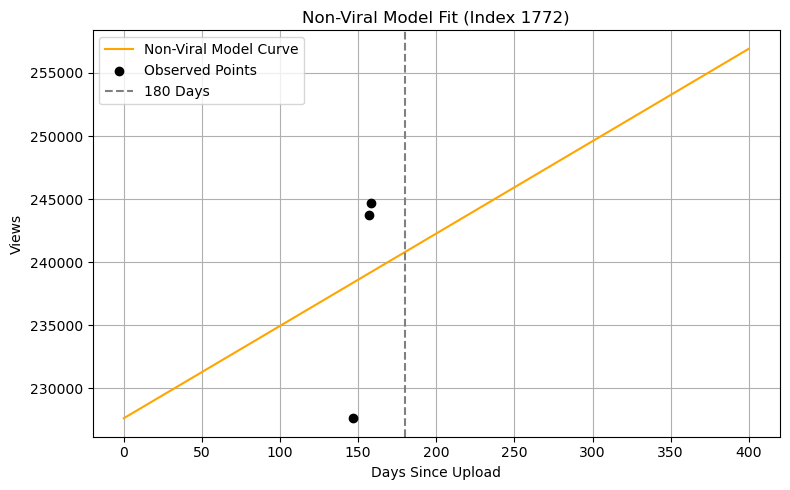

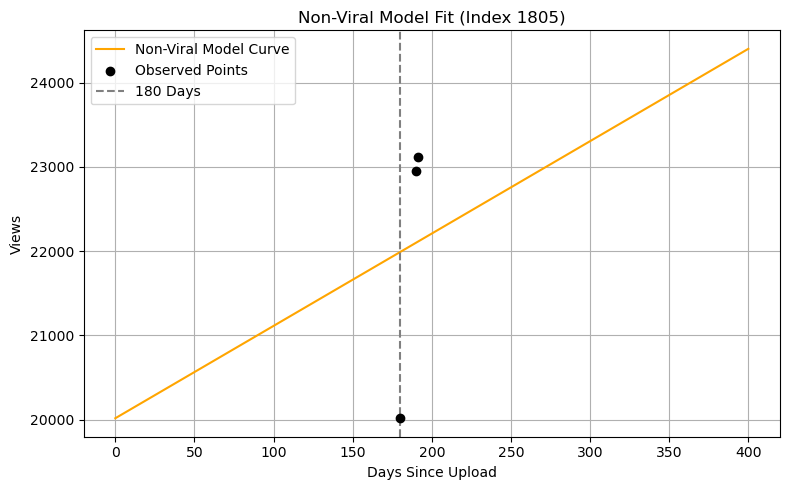

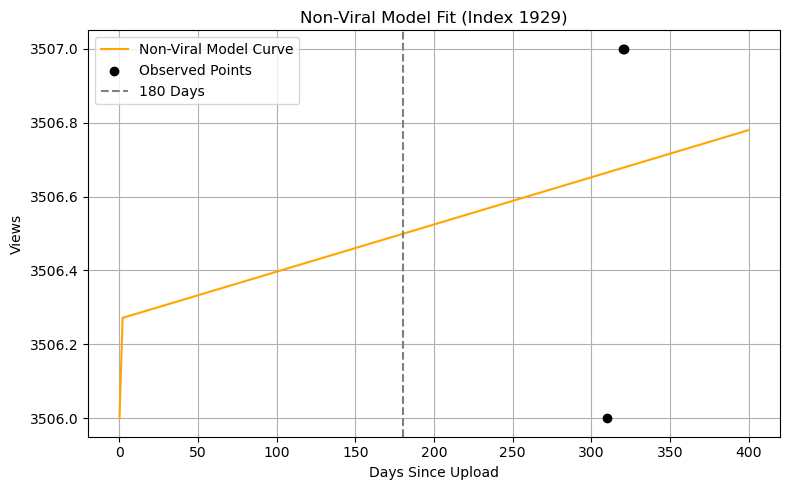

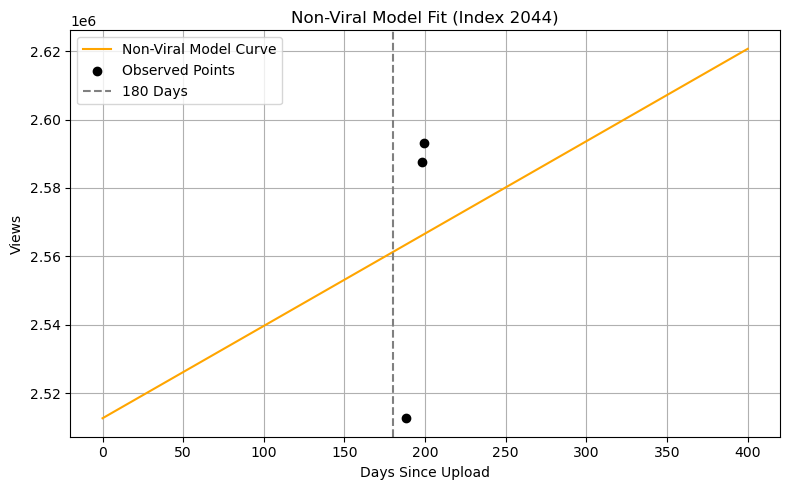

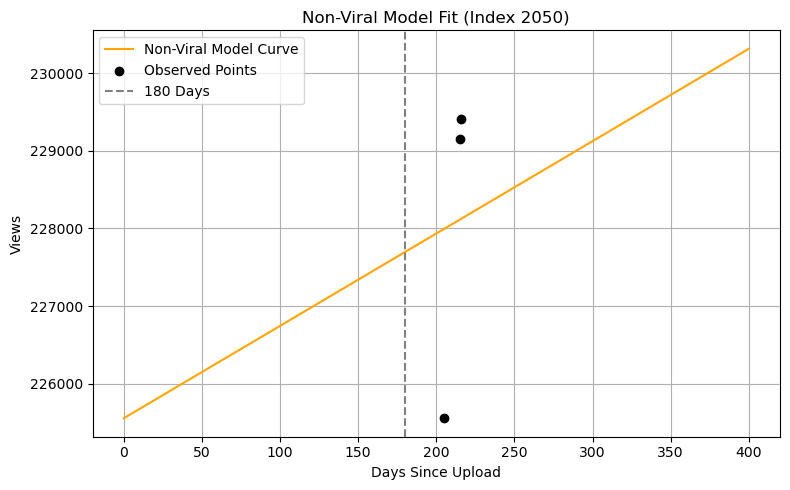

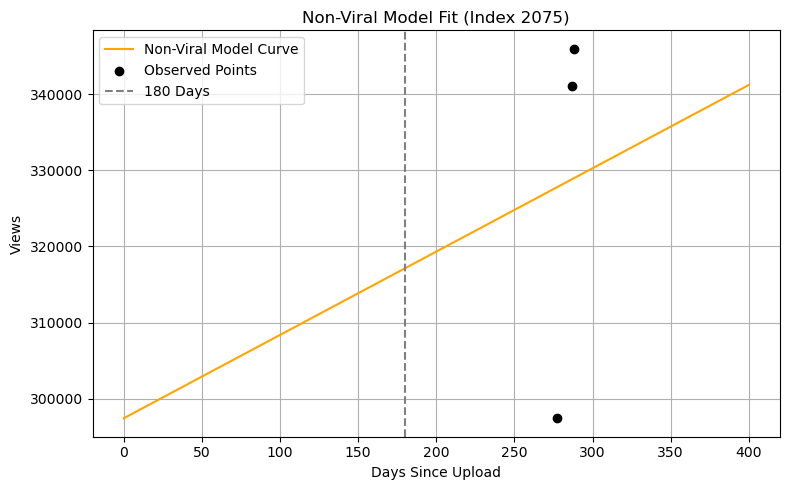

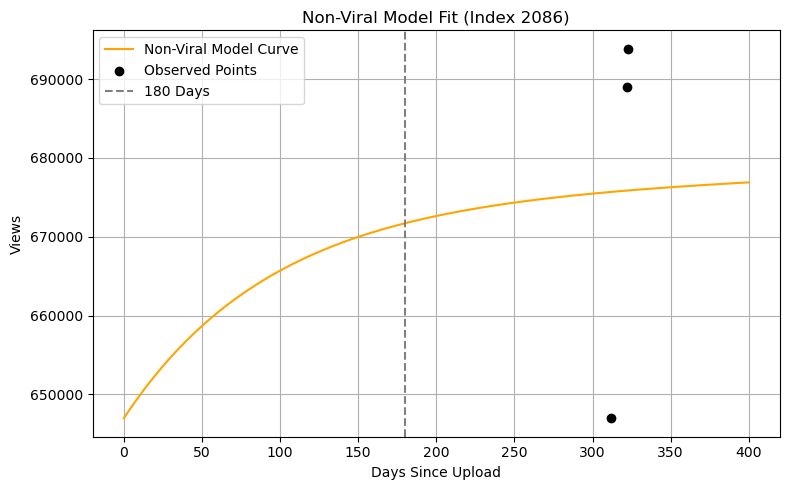

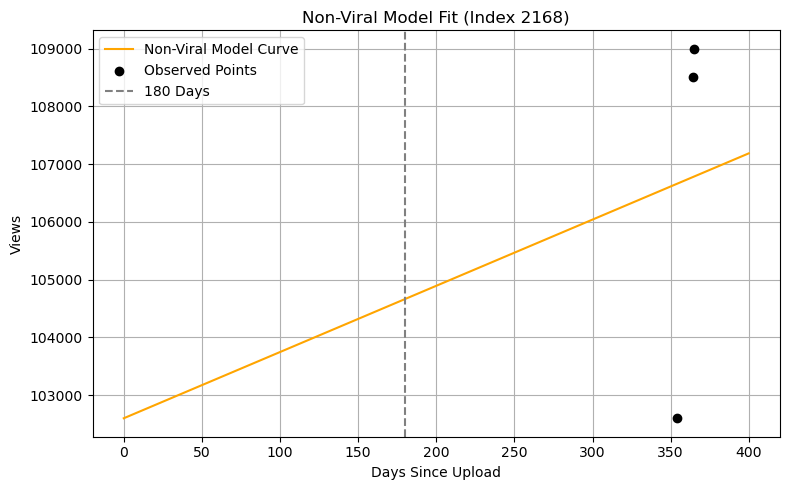

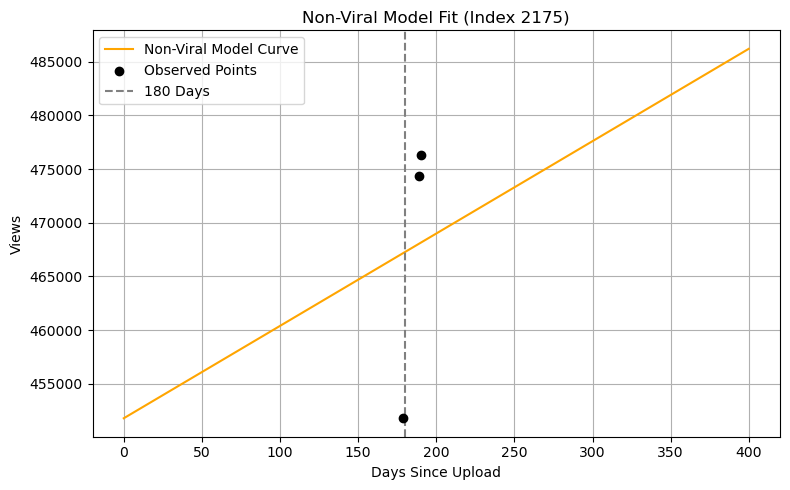

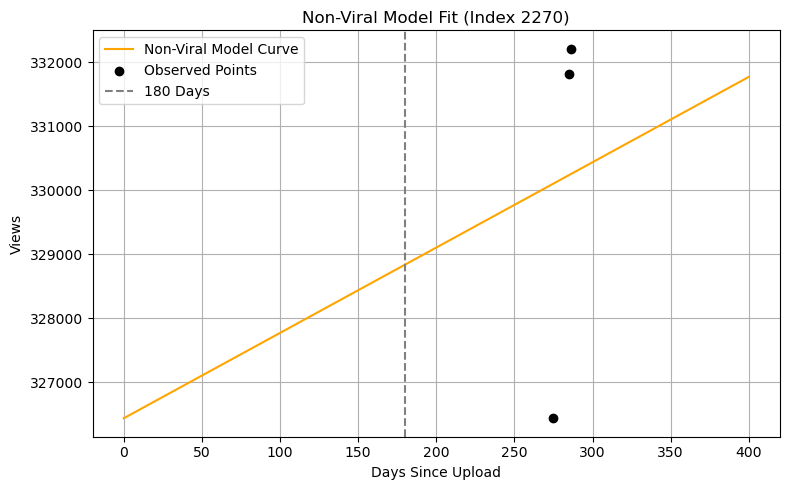

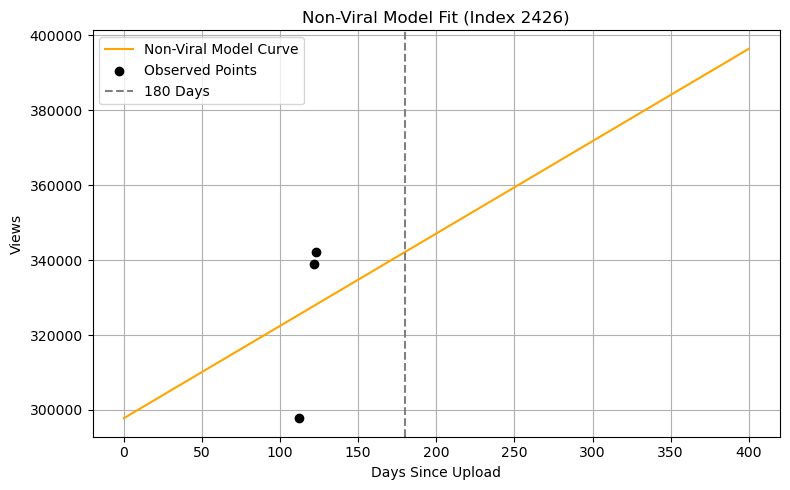

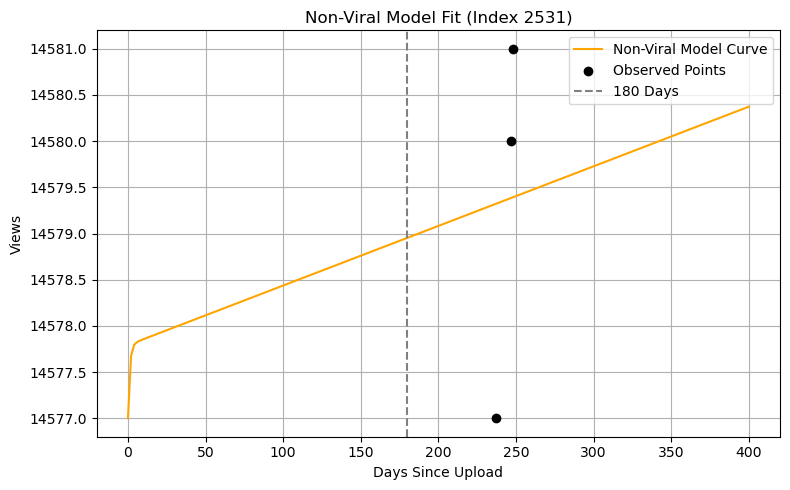

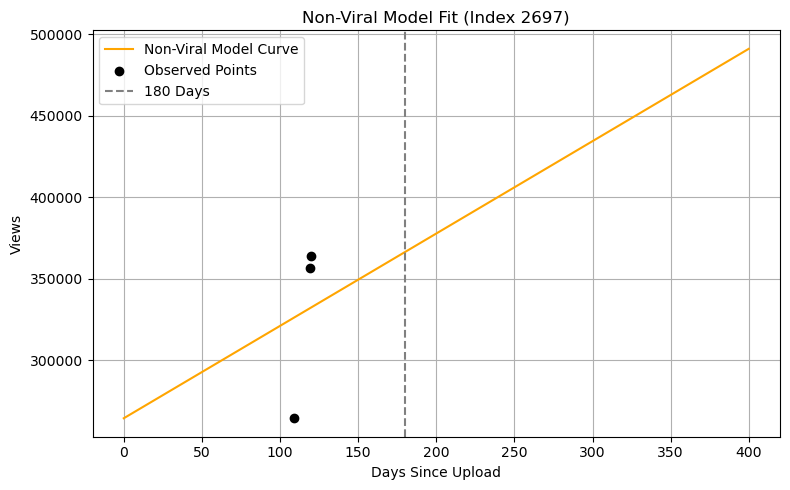

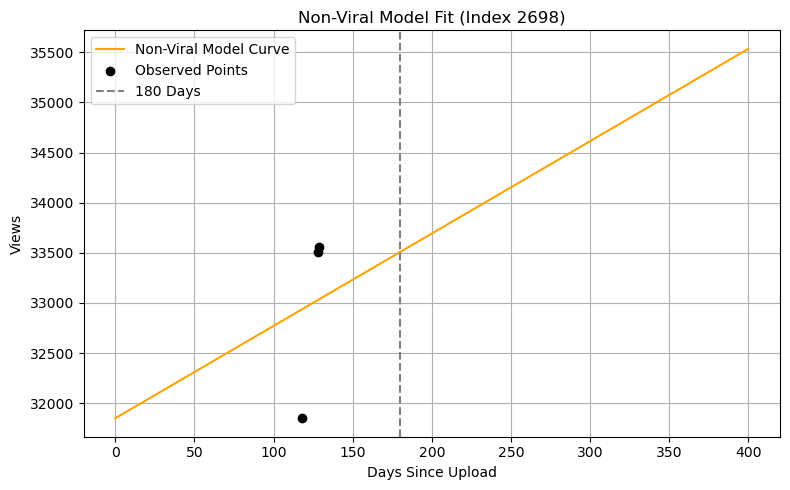

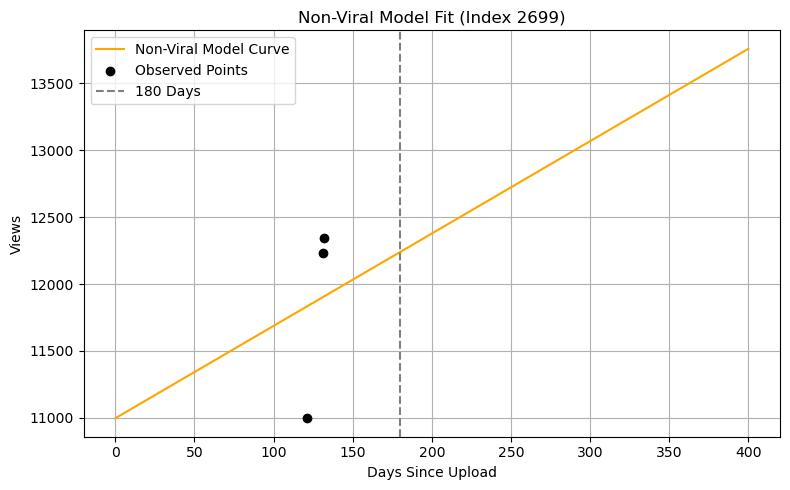

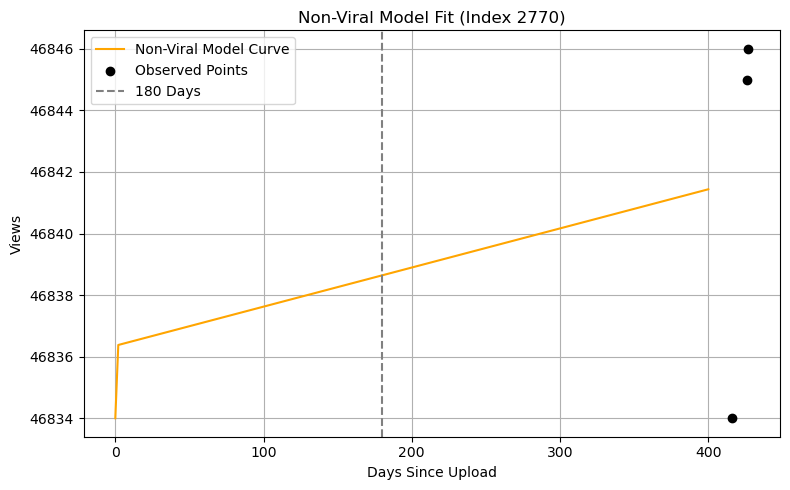

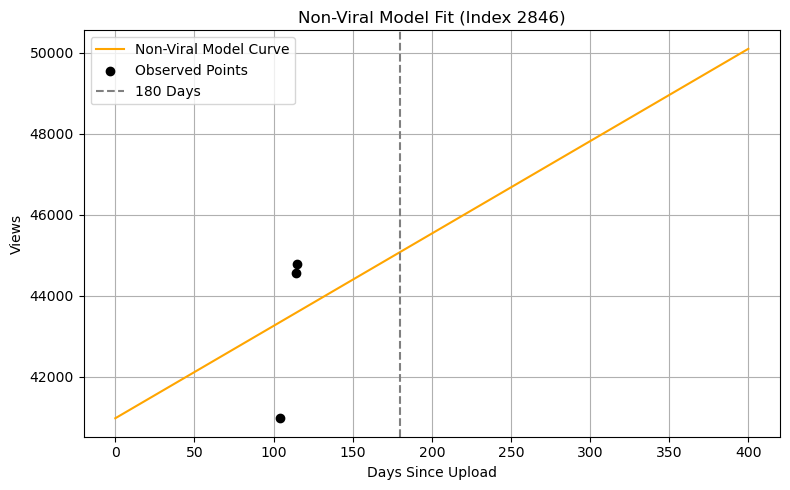

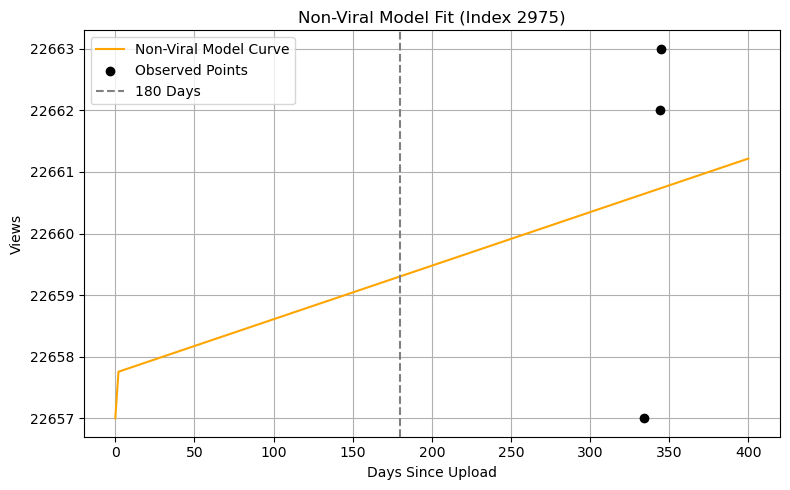

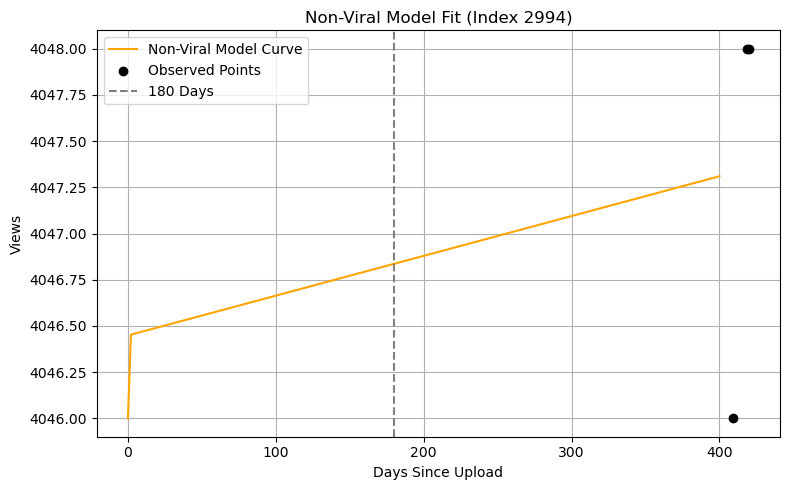

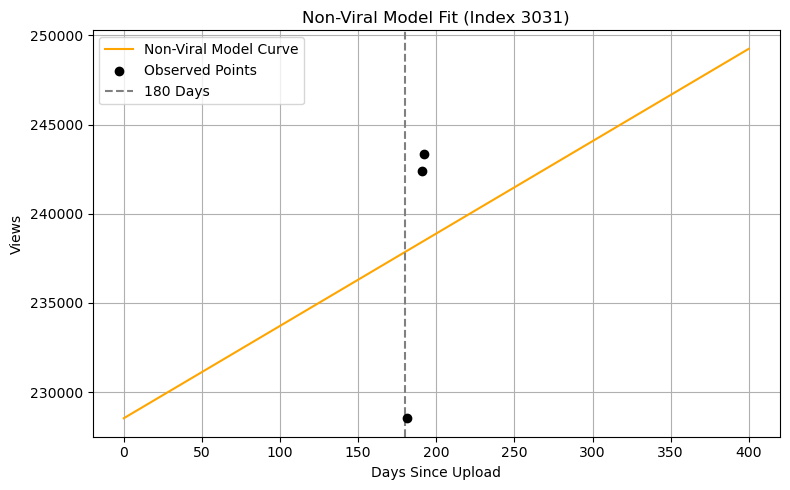

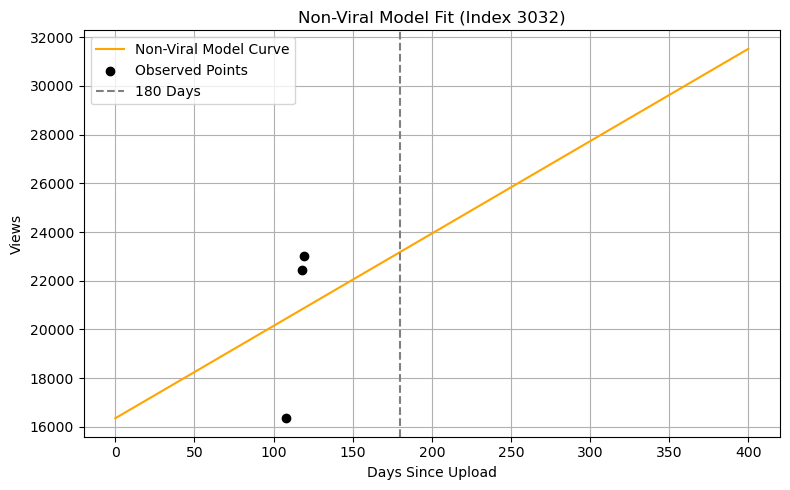

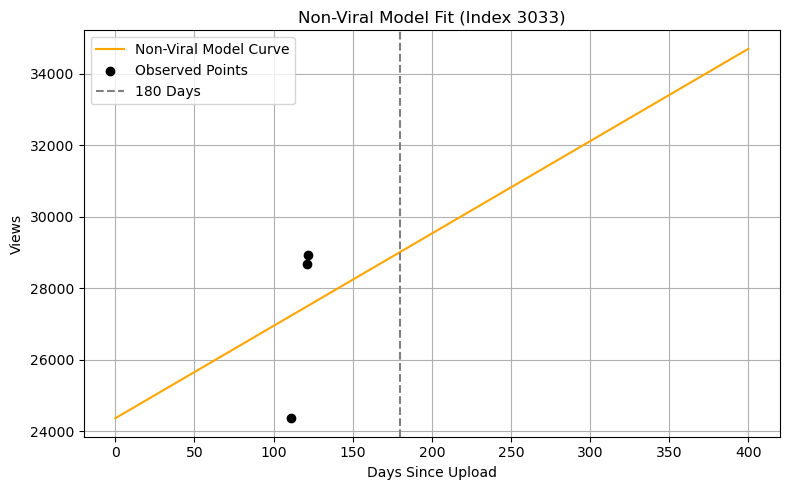

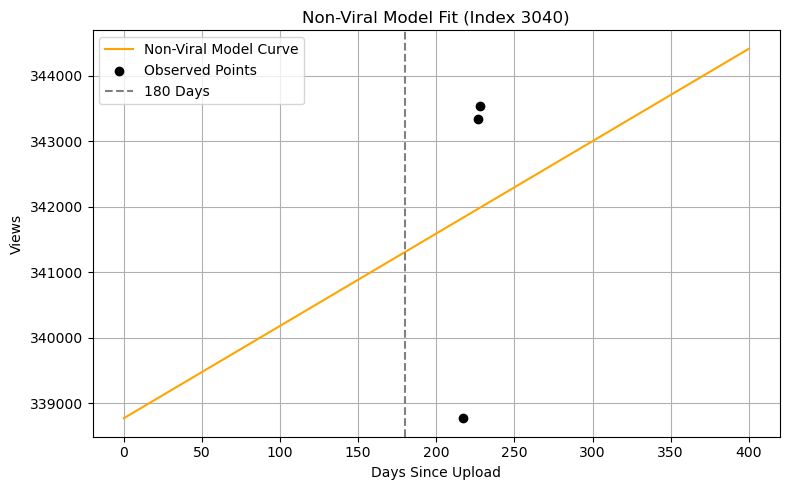

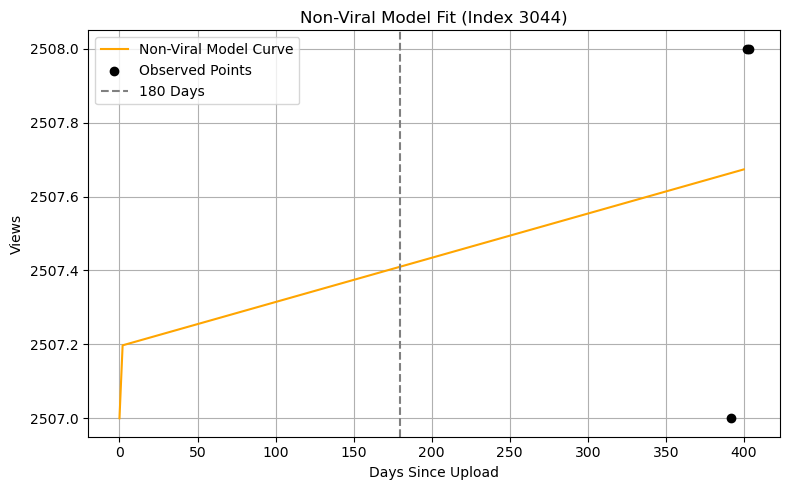

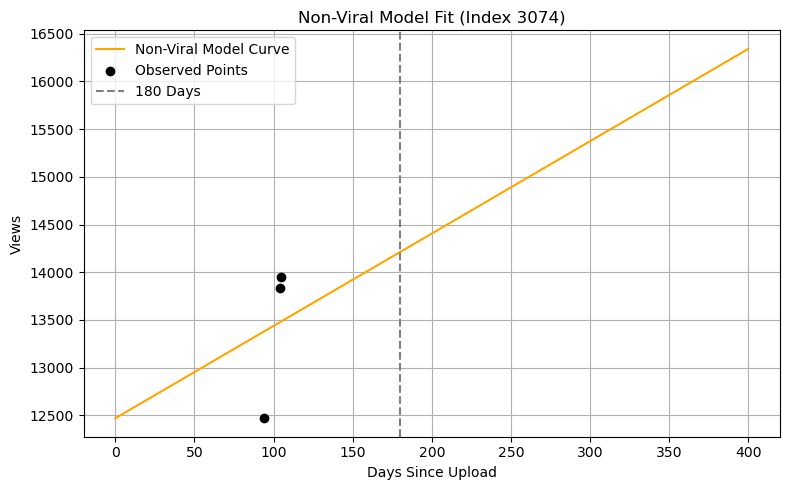

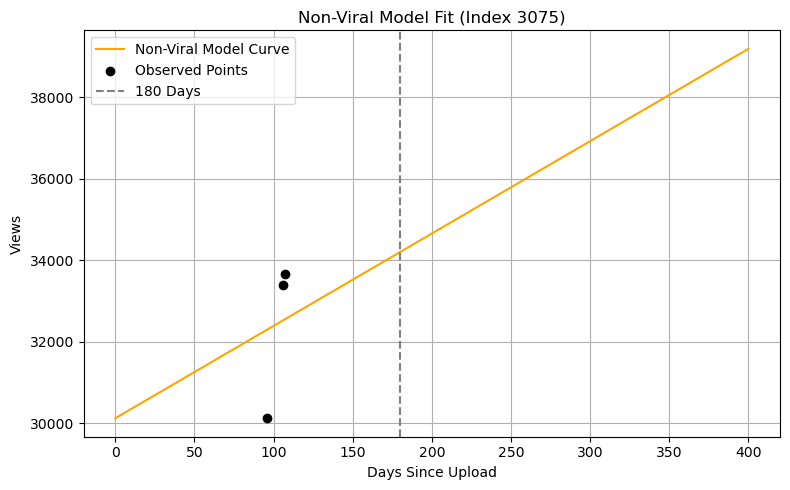

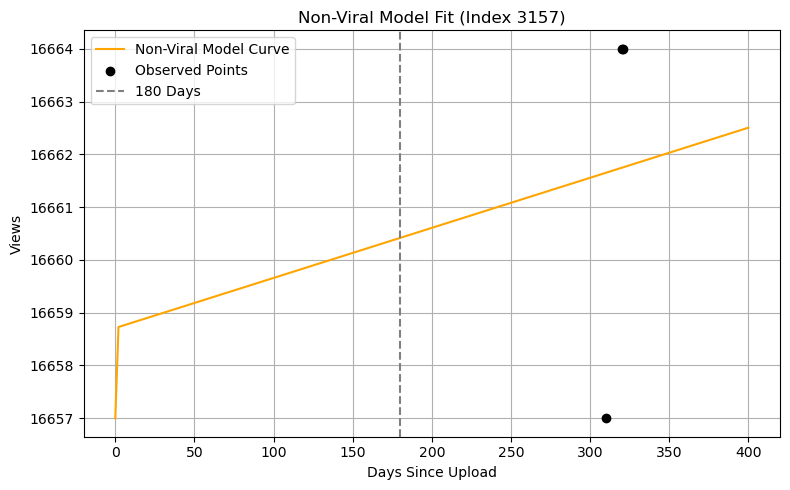

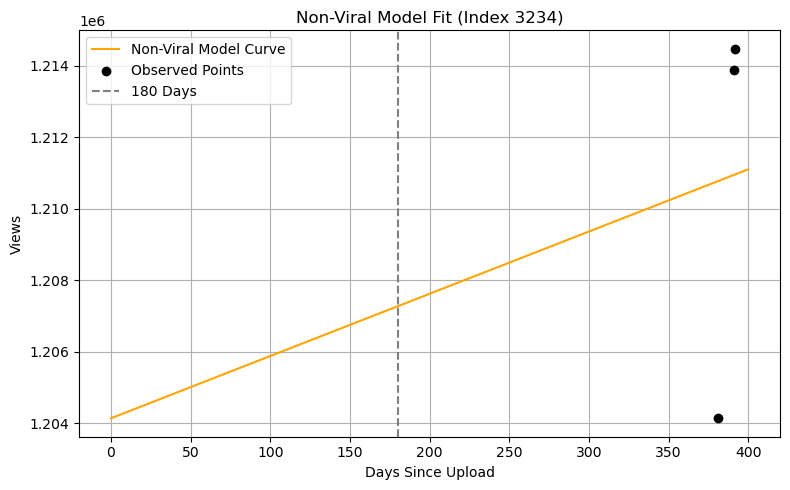

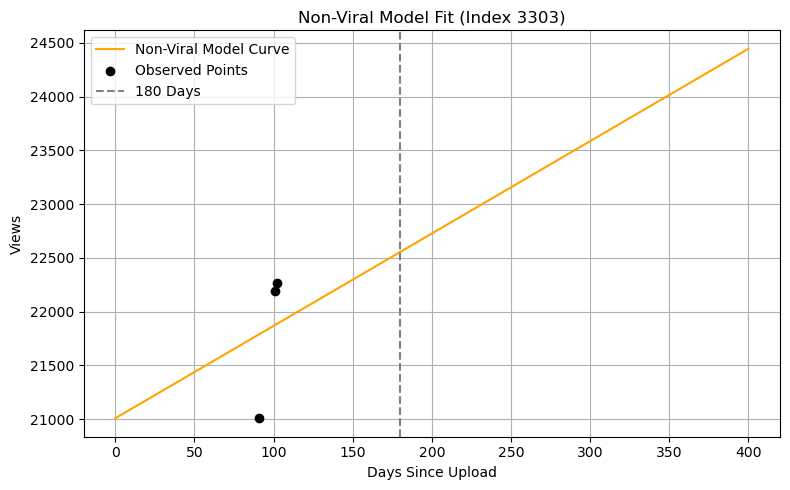

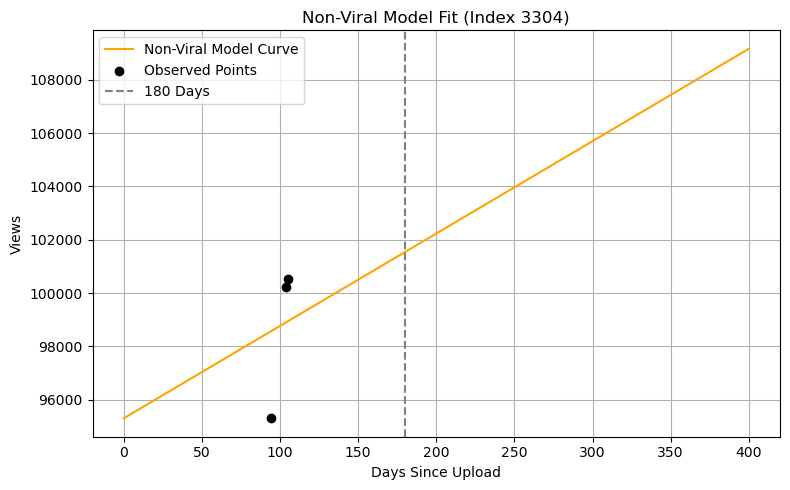

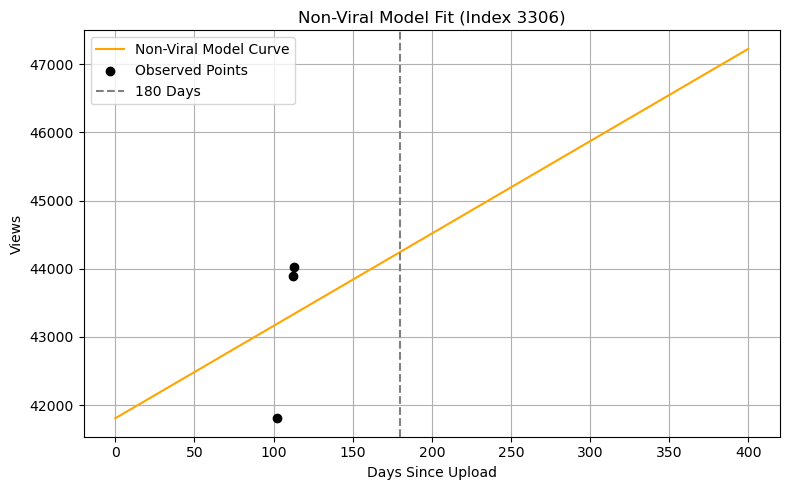

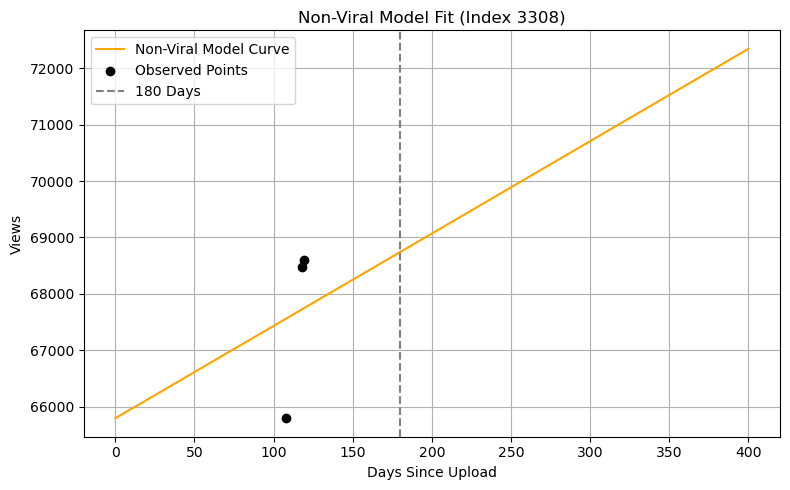

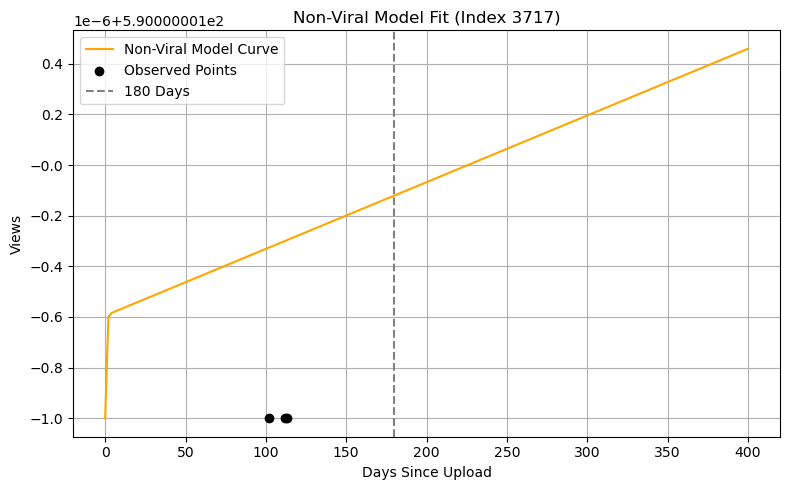

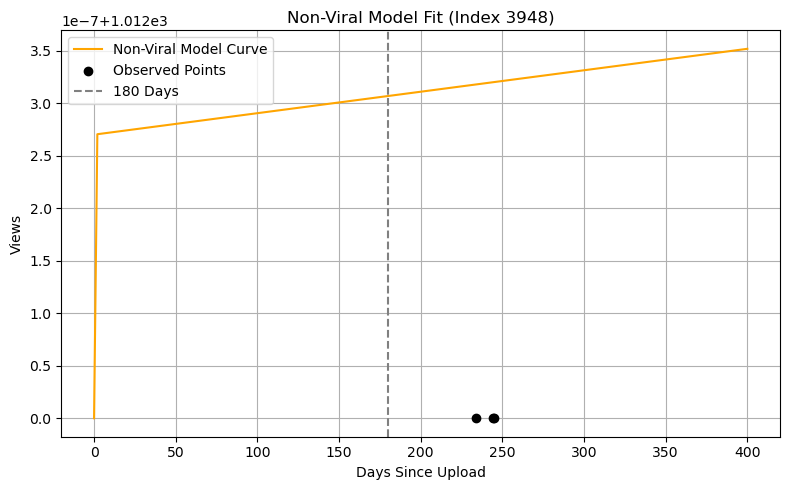

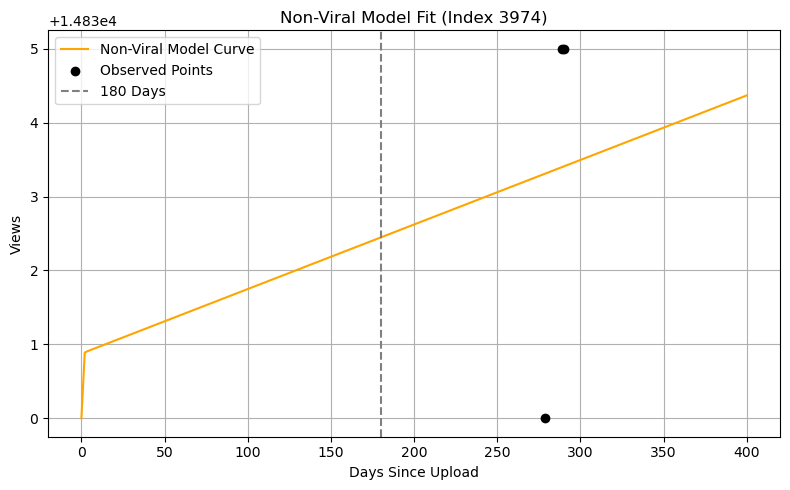

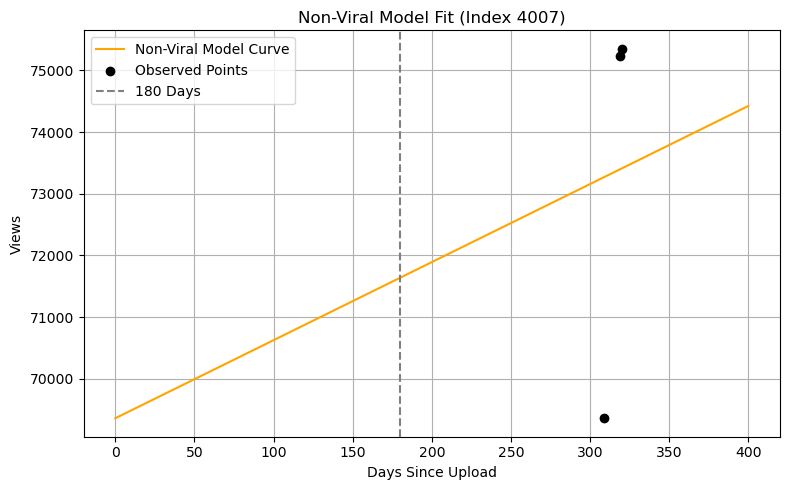

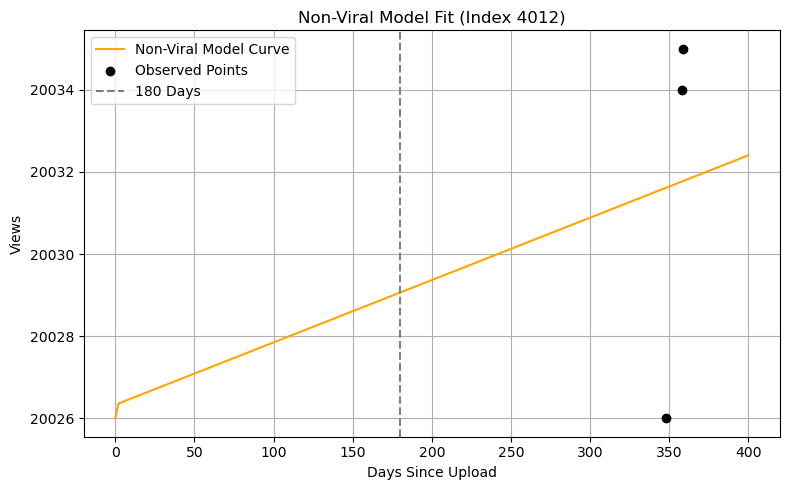

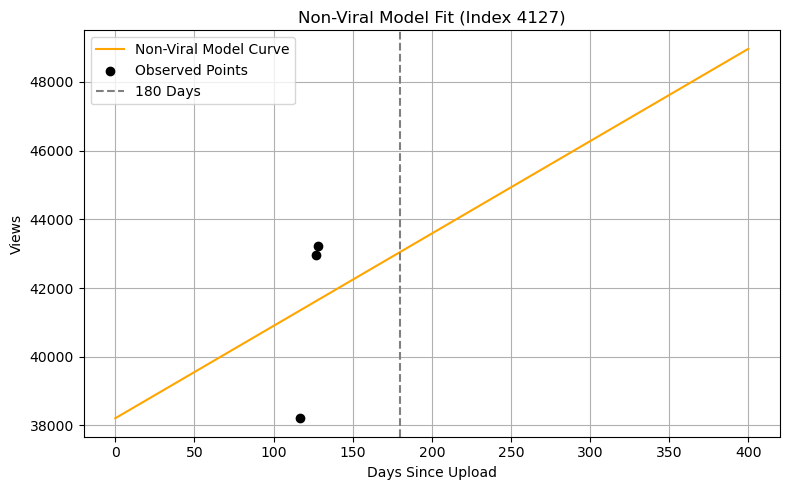

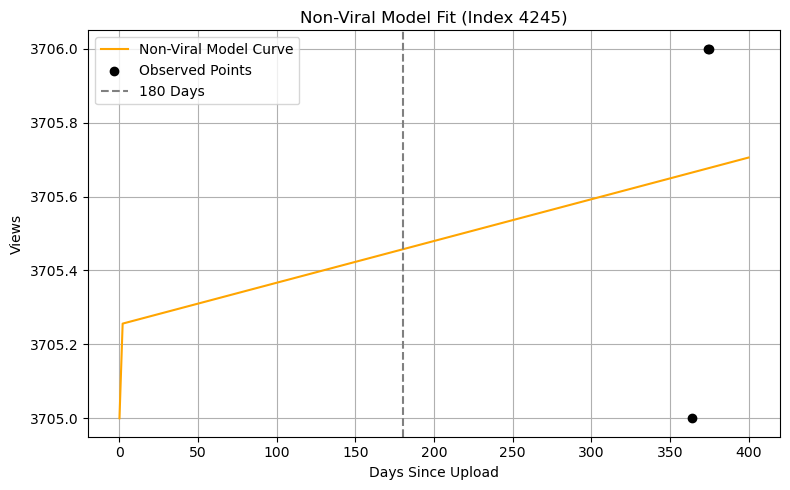

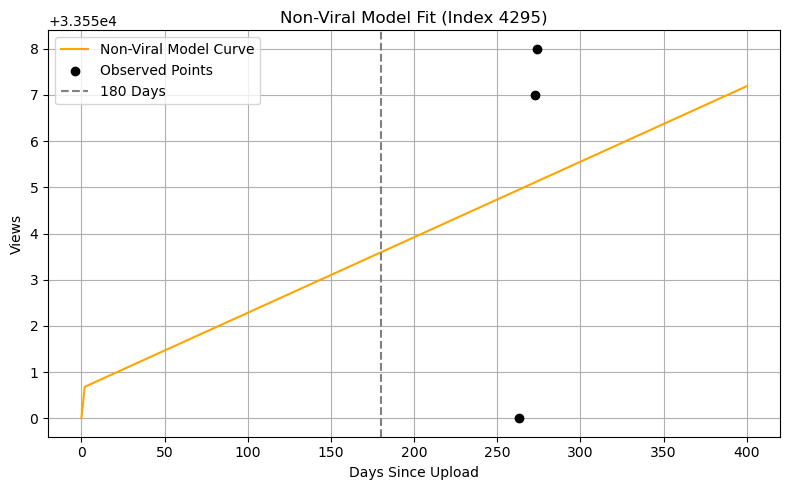

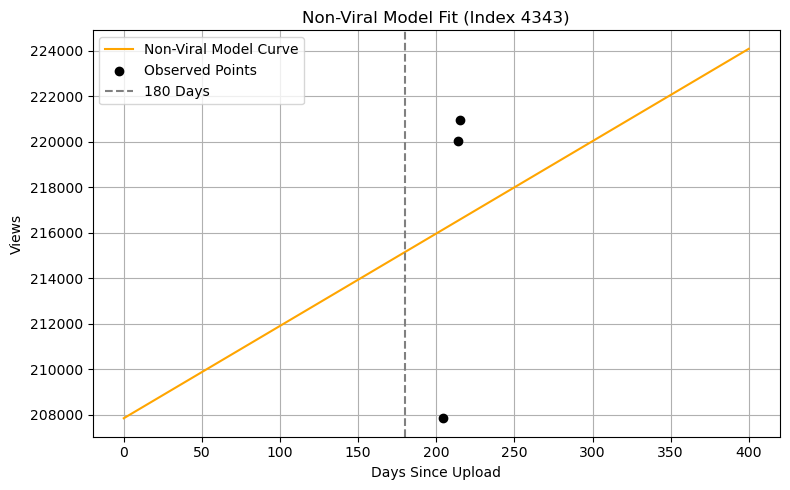

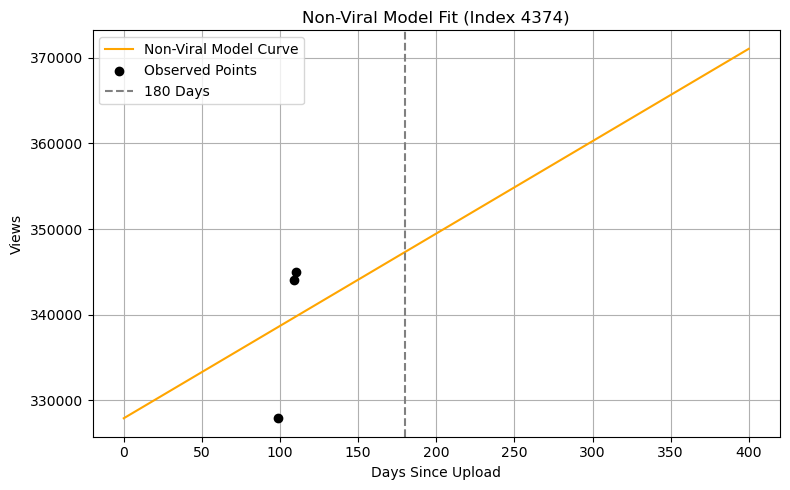

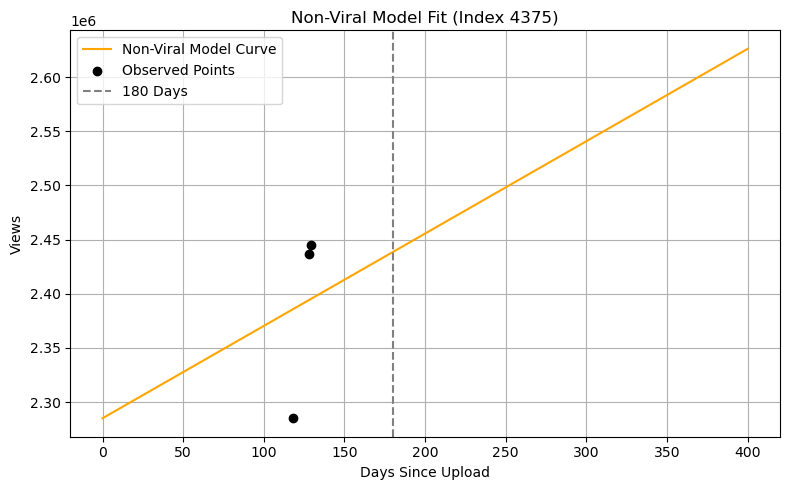

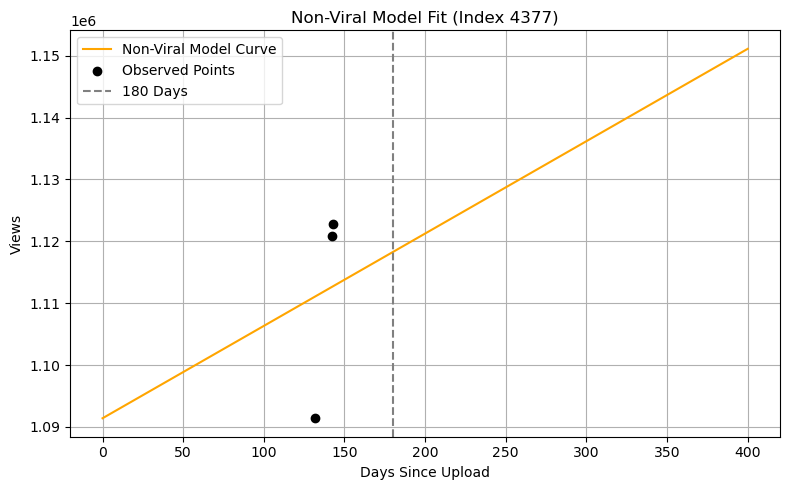

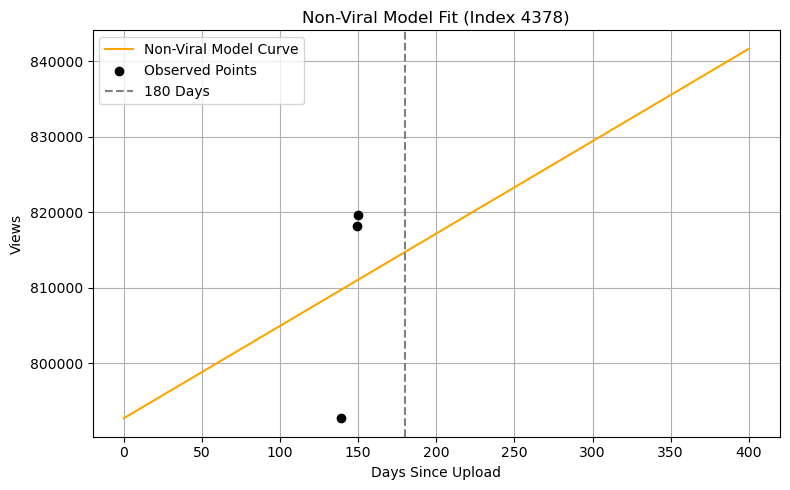

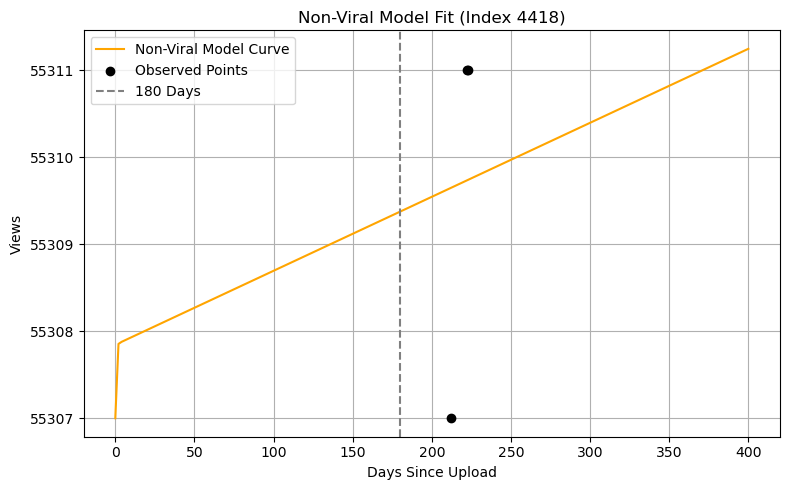

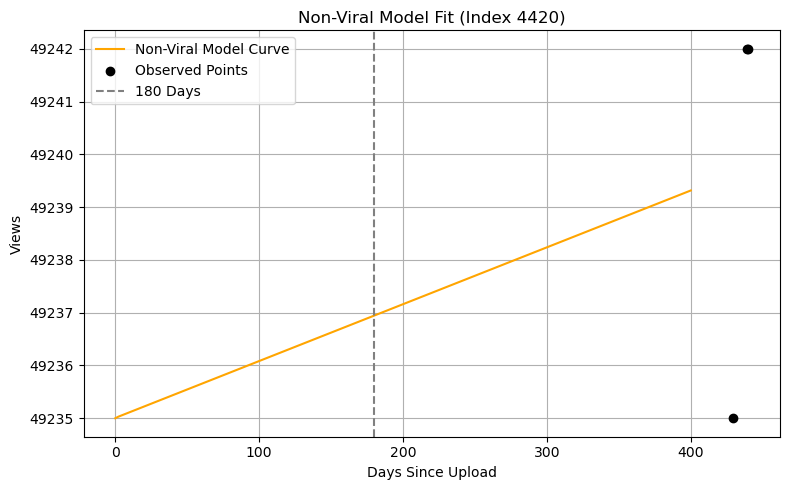

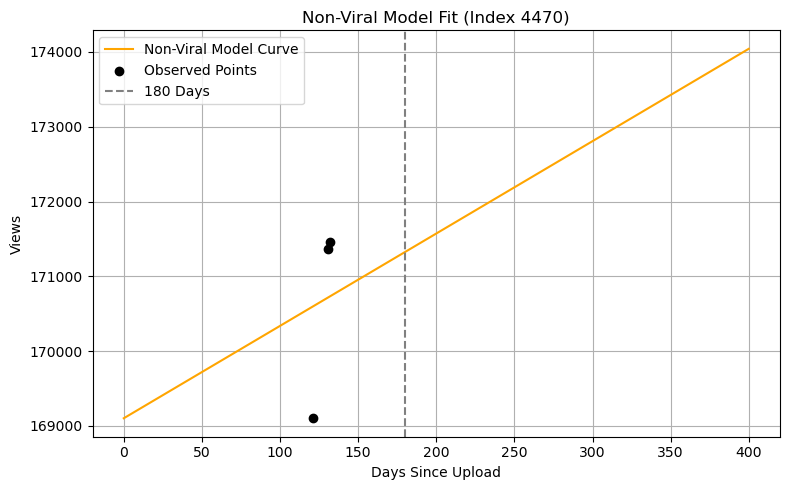

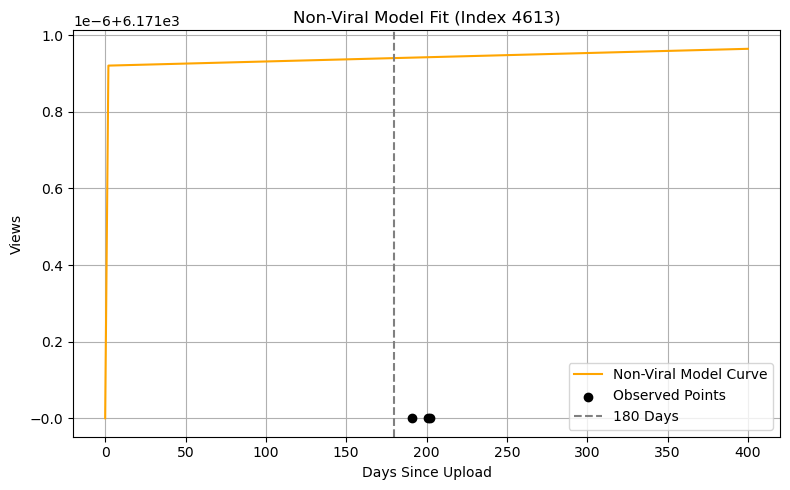

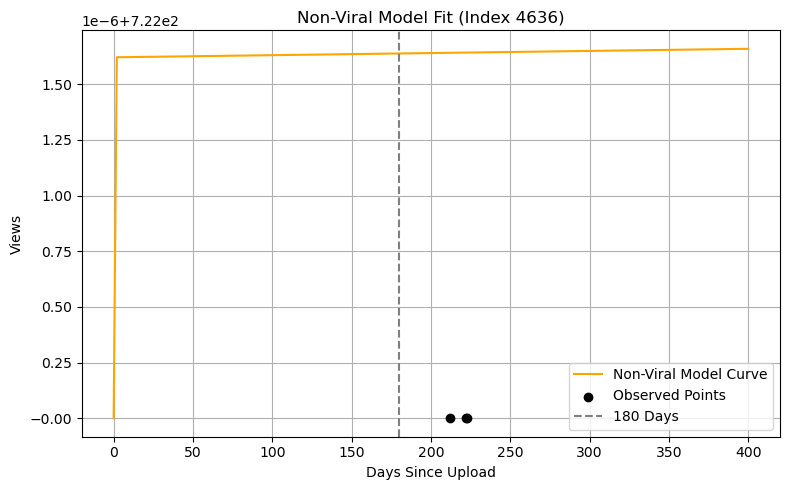

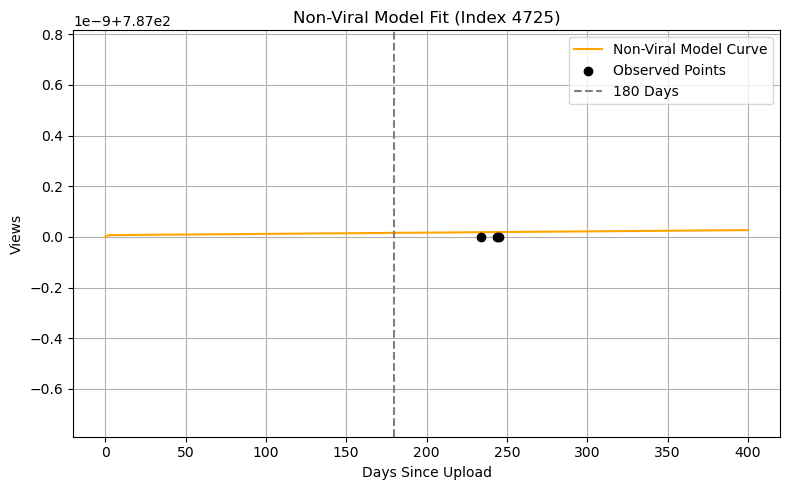

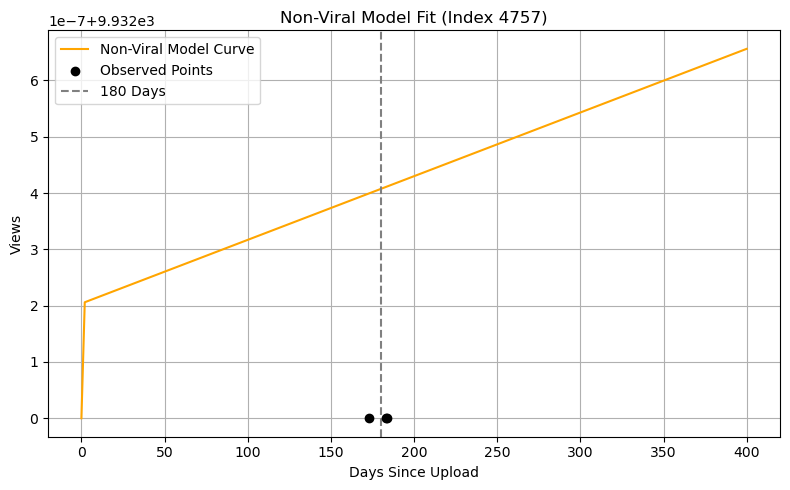

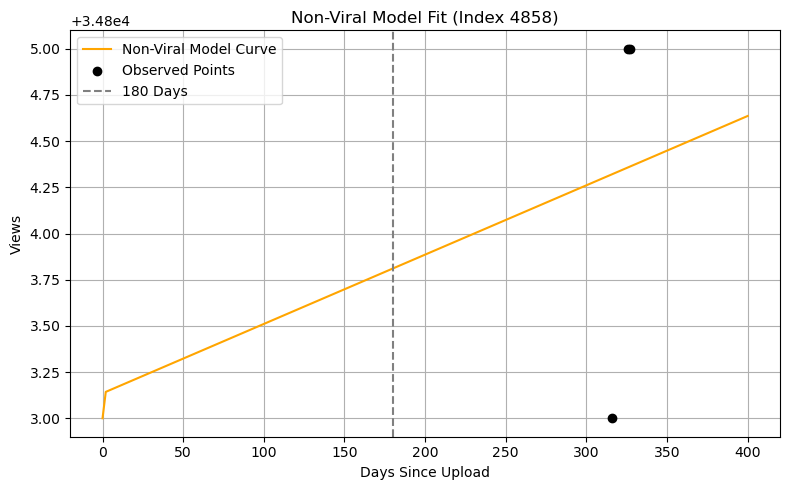

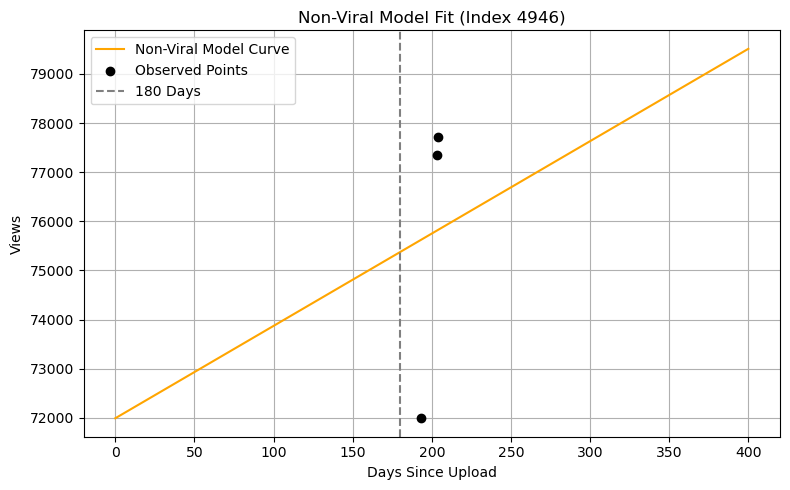

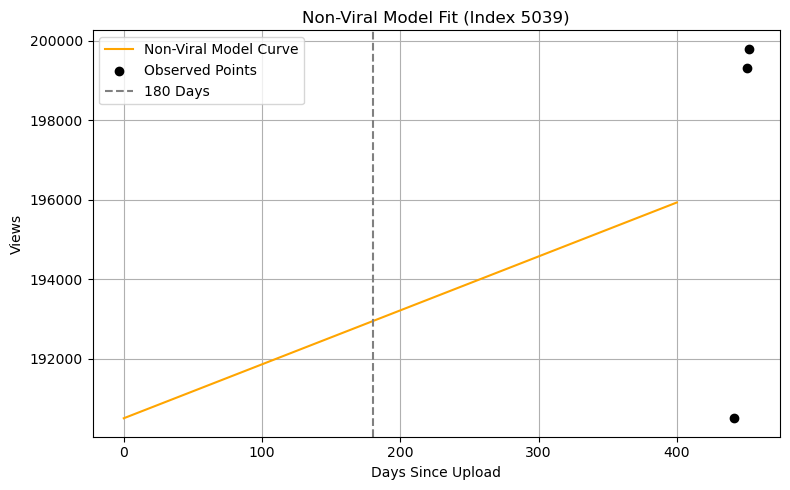

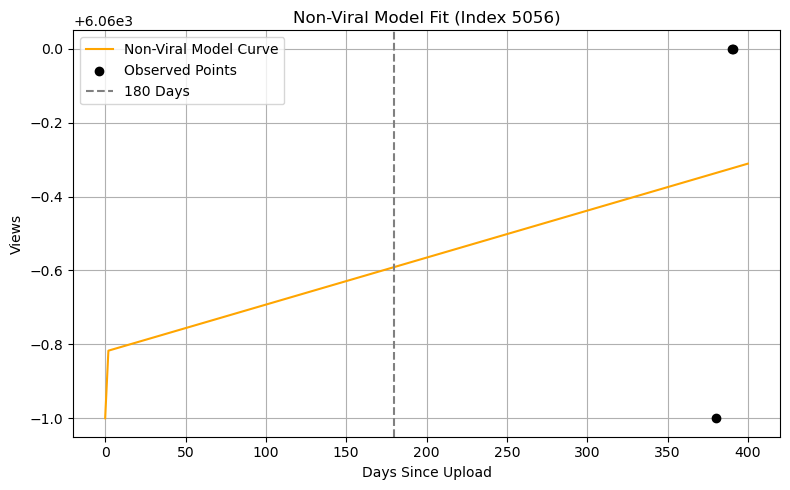

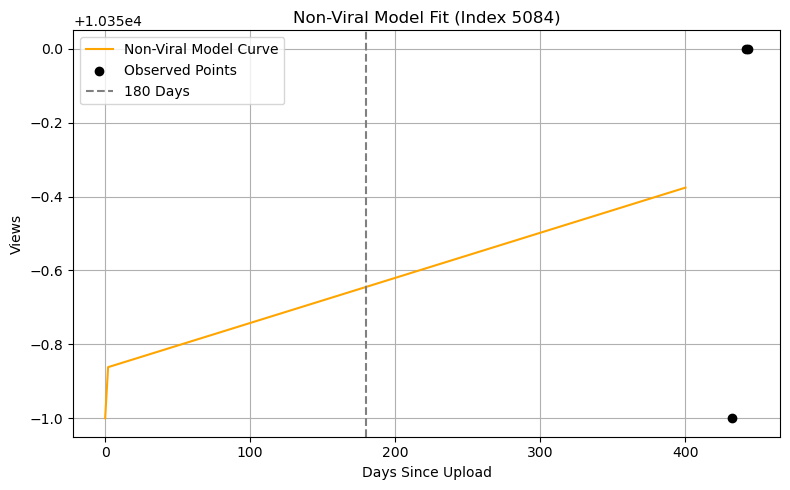

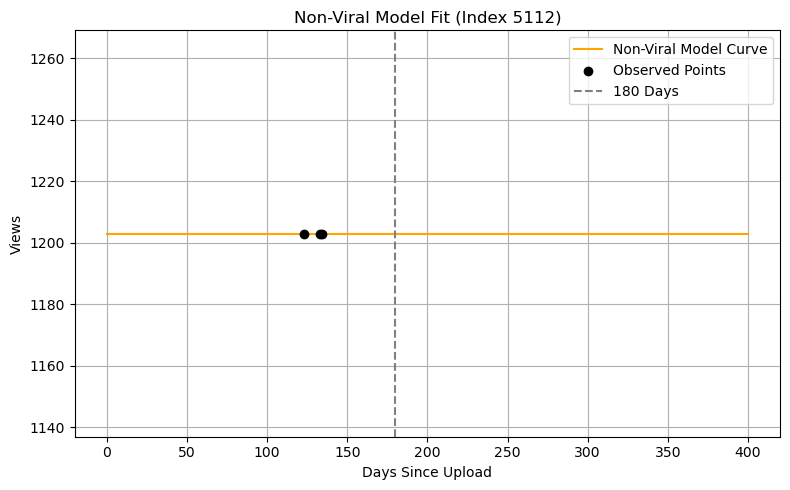

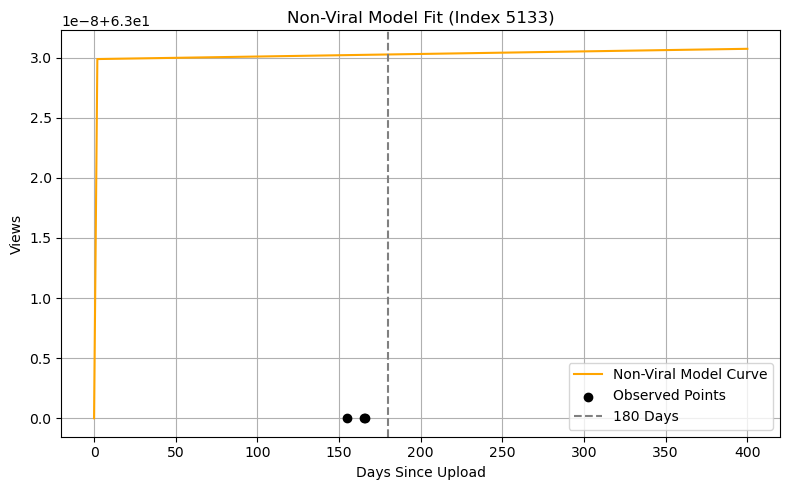

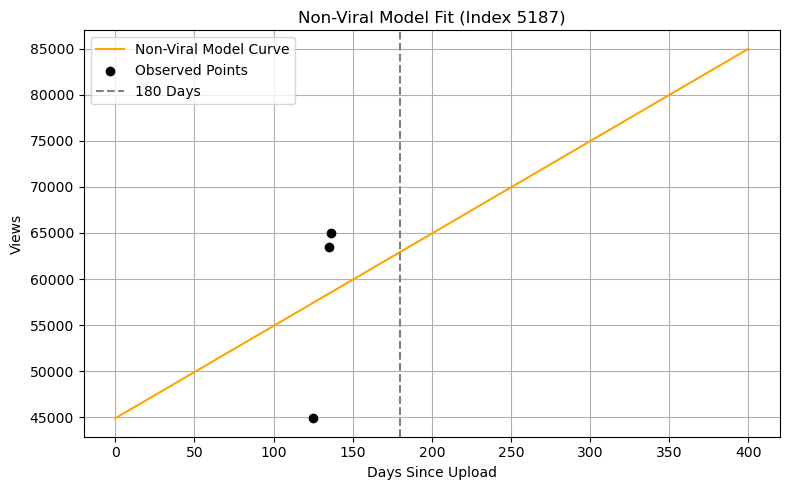

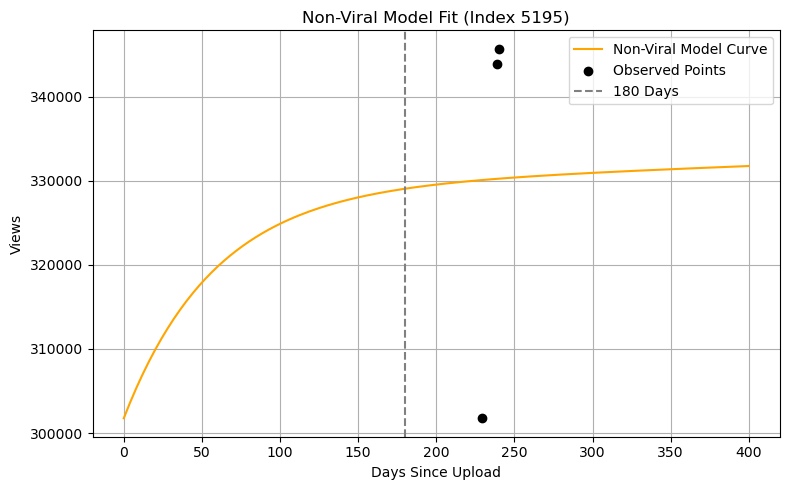

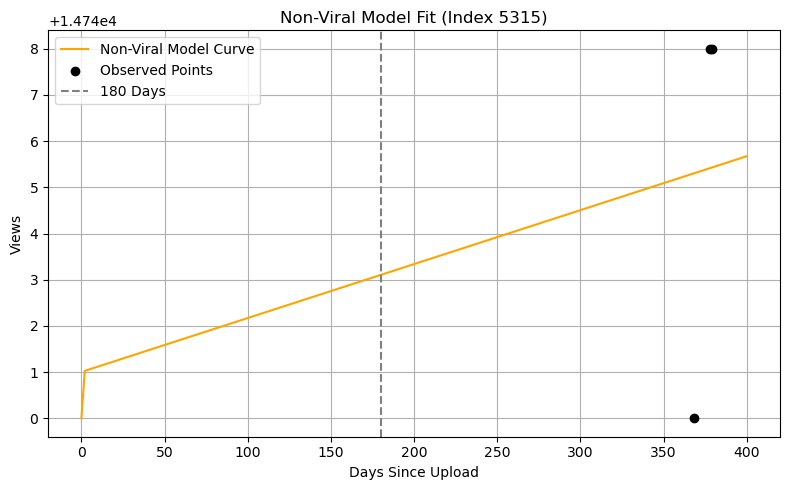

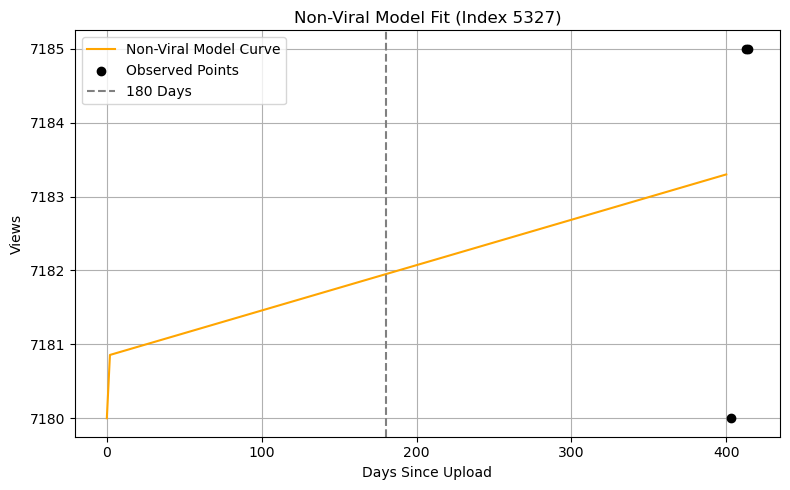

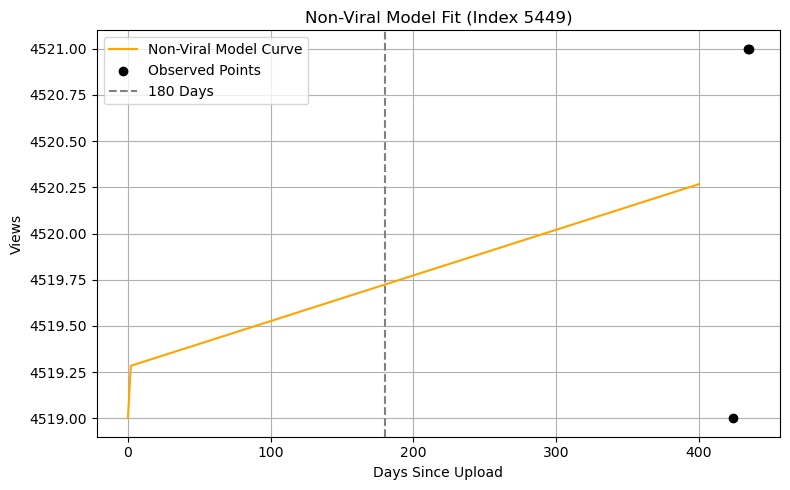

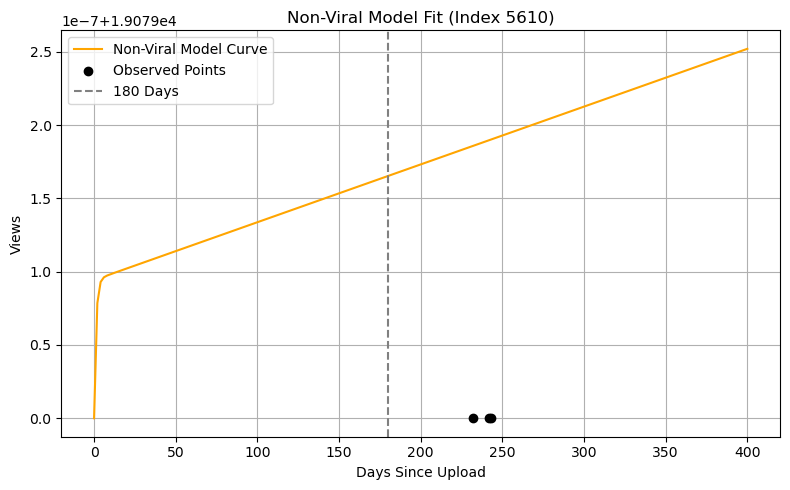

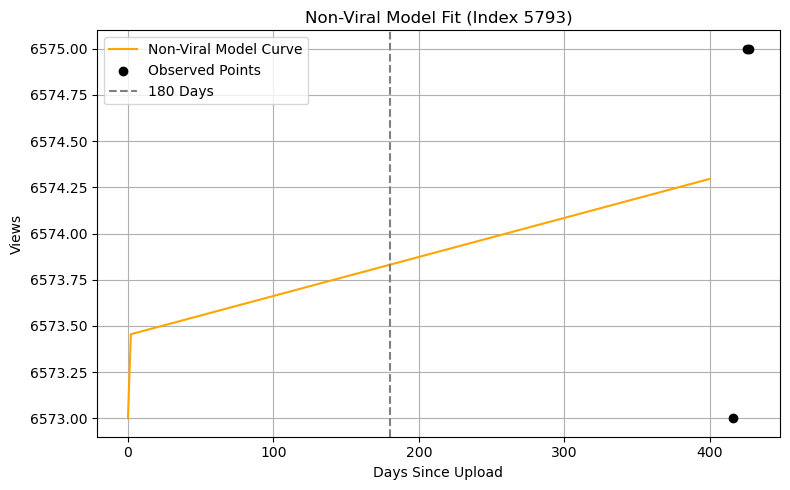

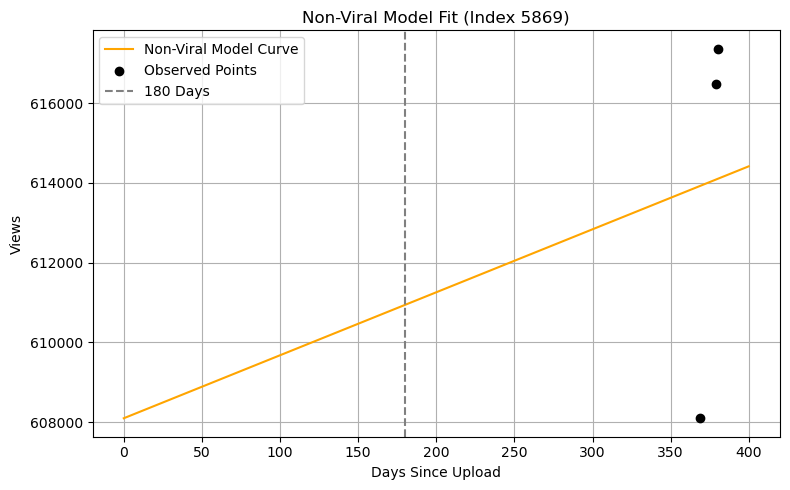

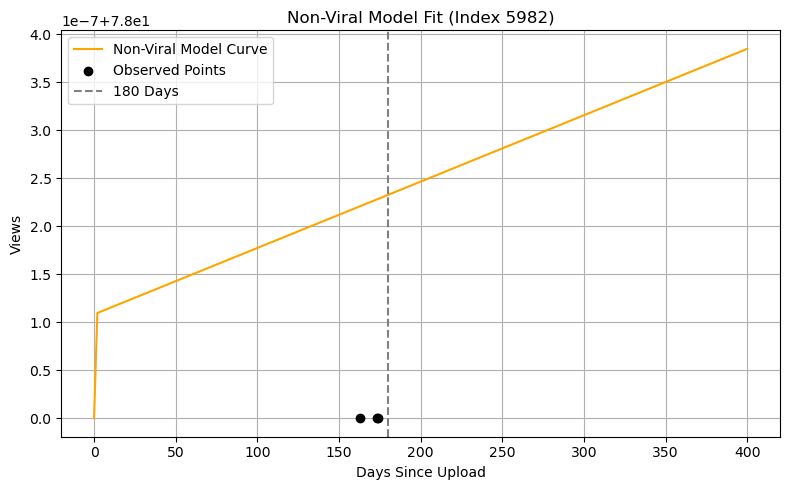

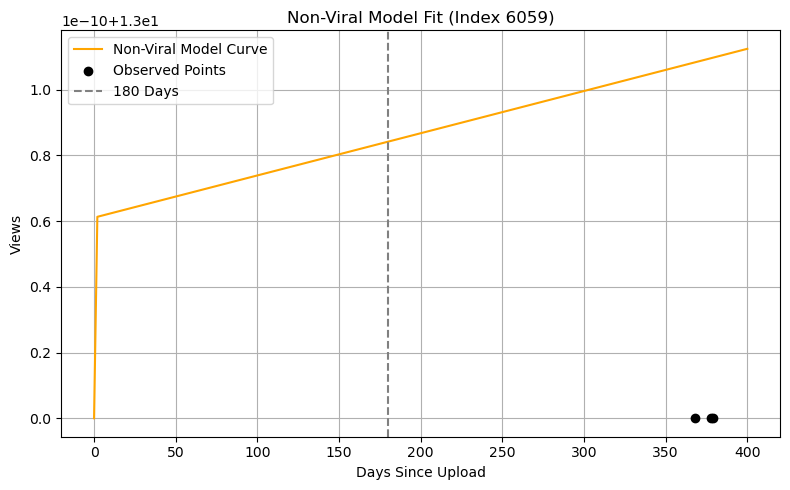

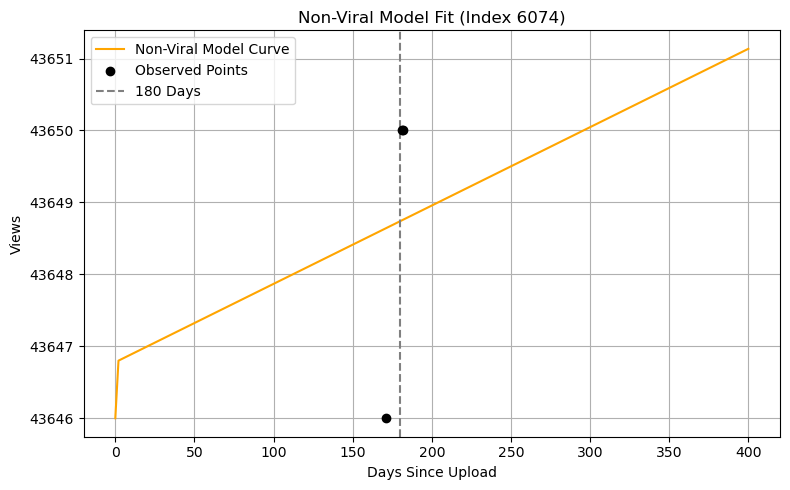

In [356]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 비바이럴 모델 정의
def nonviral_model(t, M, lambd, k, S0):
    return S0 + (M - S0) * (1 - np.exp(-lambd * t)) + k * t

# 시각화용 첫 번째 유효 샘플 찾기
for idx, row in df.iterrows():
    t_vals = np.array([
        row['upload_elapsed_0511'],
        row['upload_elapsed_0521'],
        row['upload_elapsed_0522']
    ])
    y_vals = np.array([
        row['views_0511'],
        row['views_0521'],
        row['views_0522']
    ])

    if any(np.isnan(t_vals)) or any(np.isnan(y_vals)) or min(y_vals) <= 0:
        continue

    S0 = y_vals[0]
    init_guess = [max(y_vals) * 1.5, 0.05, 10]

    try:
        popt, _ = curve_fit(lambda t, M, lambd, k: nonviral_model(t, M, lambd, k, S0),
                            t_vals, y_vals, p0=init_guess, bounds=(0, np.inf))
        M, lambd, k = popt
        if M < S0:
            continue

        # 예측 곡선 생성
        t_fit = np.linspace(0, 400, 200)
        y_fit = nonviral_model(t_fit, M, lambd, k, S0)

        # 그래프 시각화
        plt.figure(figsize=(8, 5))
        plt.plot(t_fit, y_fit, label='Non-Viral Model Curve', color='orange')
        plt.scatter(t_vals, y_vals, color='black', zorder=5, label='Observed Points')
        plt.axvline(180, linestyle='--', color='gray', label='180 Days')
        plt.title(f"Non-Viral Model Fit (Index {idx})")
        plt.xlabel("Days Since Upload")
        plt.ylabel("Views")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        # break  # 첫 번째 유효한 샘플만 시각화
    except:
        continue
